# Analysis and Prediction for Advertisements on Facebook 

**Author**: Yinuo Zeng      

**Email**: zengx293@umn.edu

As an influential social media containing huge users, Facebook is the first choice of media advertisements strategy. Therefore, we choose the data from Facebook to explore the potential factors of Facebook advertisements with respect to the effects of brand building and to predict the number of user interactions.

## Load Libraries

In [84]:
library(repr)
options(repr.plot.width=10, repr.plot.height=8)

In [85]:
library(ggplot2)
library(tidyverse)
library(DMwR)
library(car)
library(exactRankTests)
library(FSA)
library(caret)
library("earth")
library(doParallel)

## Part1. Import Data

[Data](http://archive.ics.uci.edu/ml/datasets/Facebook+metrics) is from UCI machine learing repository. It contains 500 observations and 19 variables (1 response and 18 predictors).

Description of variables:

*Page.total.likes (Total)* : The number of people who have liked the company's page.

*Type (Type)*: Type of content (Link, Photo, Status, Video)

*Category (Category)*: Manual content characterization: action (special offers and contests), product (direct advertisement, explicit brand content), and inspiration (non-explicit brand related content)

*Post.Month (Month)*: The month when the advertisement is posted (0~12)

*Post.Weekday (Weekday)*: The weekday when the advertisement is posted (1~7)

*Post.Hour (Hour)*: The time when the advertisement is posted (1:23)

*Paid (Paid)*: If the company paid to Facebook for advertising (yes, no)

*Lifetime.Post.Total.Reach (Reach)*: The number of people who saw a page post (unique users).

*Lifetime.Post.Total.Impressions (Impression)*: the number of times a post from a page is displayed

*Lifetime.Engaged.Users (Engaged)*: The number of people who clicked anywhere in a post (unique users)

*Lifetime.Post.Consumers (Consumers)*: The number of people who clicked anywhere in a post.

*Lifetime.Post.Consumptions (Consumptions)*: The number of clicks anywhere in a post.

*Lifetime.Post.Impressions.by.people.who.have.liked.your.Page (ImpressionLike)*: Total number of impressions just from people who have liked a page.

*Lifetime.Post.reach.by.people.who.like.your.Page (ReachLike)*: The number of people who saw a page post because they have liked that page (unique users).

*Lifetime.People.who.have.liked.your.Page.and.engaged.with.your.post (LikeEngage)*: The number of people who have liked a Page and clicked anywhere in a post (Unique users).

*comment (Comment)*: The number of comments on the publication.

*like (Like)*: The number of “Likes” on the publication.

*share (Share)*: The number of times the publication was shared.

*Total Interaction (Interaction)*: The sum of *comment*, *like* and *share* of the post.

In [86]:
dataset = read.csv(file="~/Project/Facebook.csv", header=T, sep=";")

In [87]:
dim(dataset)

[1] 500  19

This dataset includes 500 observations and 19 variables.

19 variables are:

In [88]:
names(dataset)

[1] "Page.total.likes"                                                   
 [2] "Type"                                                               
 [3] "Category"                                                           
 [4] "Post.Month"                                                         
 [5] "Post.Weekday"                                                       
 [6] "Post.Hour"                                                          
 [7] "Paid"                                                               
 [8] "Lifetime.Post.Total.Reach"                                          
 [9] "Lifetime.Post.Total.Impressions"                                    
[10] "Lifetime.Engaged.Users"                                             
[11] "Lifetime.Post.Consumers"                                            
[12] "Lifetime.Post.Consumptions"                                         
[13] "Lifetime.Post.Impressions.by.people.who.have.liked.your.Page"       
[14] "Lifetime.Post.reach.by.people.who.like.your.Page"                   
[15] "Lifetime.People.who.have.liked.your.Page.and.engaged.with.your.post"
[16] "comment"                                                            
[17] "like"                                                               
[18] "share"                                                              
[19] "Total.Interactions"

*Total.Interactions* is response, and the other 18 variables are predictors.

In [89]:
head(dataset)

Page.total.likes Type   Category Post.Month Post.Weekday Post.Hour Paid
1 139441           Photo  2        12         4             3        0   
2 139441           Status 2        12         3            10        0   
3 139441           Photo  3        12         3             3        0   
4 139441           Photo  2        12         2            10        1   
5 139441           Photo  2        12         2             3        0   
6 139441           Status 2        12         1             9        0   
  Lifetime.Post.Total.Reach Lifetime.Post.Total.Impressions
1  2752                      5091                          
2 10460                     19057                          
3  2413                      4373                          
4 50128                     87991                          
5  7244                     13594                          
6 10472                     20849                          
  Lifetime.Engaged.Users Lifetime.Post.Consumers Lifetime.Post.Consumptions
1  178                    109                     159                      
2 1457                   1361                    1674                      
3  177                    113                     154                      
4 2211                    790                    1119                      
5  671                    410                     580                      
6 1191                   1073                    1389                      
  Lifetime.Post.Impressions.by.people.who.have.liked.your.Page
1  3078                                                       
2 11710                                                       
3  2812                                                       
4 61027                                                       
5  6228                                                       
6 16034                                                       
  Lifetime.Post.reach.by.people.who.like.your.Page
1  1640                                           
2  6112                                           
3  1503                                           
4 32048                                           
5  3200                                           
6  7852                                           
  Lifetime.People.who.have.liked.your.Page.and.engaged.with.your.post comment
1  119                                                                 4     
2 1108                                                                 5     
3  132                                                                 0     
4 1386                                                                58     
5  396                                                                19     
6 1016                                                                 1     
  like share Total.Interactions
1   79  17    100              
2  130  29    164              
3   66  14     80              
4 1572 147   1777              
5  325  49    393              
6  152  33    186

## Part2. Data Clean

Modify variables names for easier implementation.

In [90]:
names(dataset) = c("Total", "Type", "Category", "Month", "Weekday", "Hour", "Paid", "Reach", "Impression",
                   "Engage", "Consumers", "Consumptions", "ImpressionLike", "ReachLike", "LikeEngage", "Comment", "Like", "Share", "Interaction")

In [91]:
str(dataset)

'data.frame':	500 obs. of  19 variables:
 $ Total         : int  139441 139441 139441 139441 139441 139441 139441 139441 139441 139441 ...
 $ Type          : Factor w/ 4 levels "Link","Photo",..: 2 3 2 2 2 3 2 2 3 2 ...
 $ Category      : int  2 2 3 2 2 2 3 3 2 3 ...
 $ Month         : int  12 12 12 12 12 12 12 12 12 12 ...
 $ Weekday       : int  4 3 3 2 2 1 1 7 7 6 ...
 $ Hour          : int  3 10 3 10 3 9 3 9 3 10 ...
 $ Paid          : int  0 0 0 1 0 0 1 1 0 0 ...
 $ Reach         : int  2752 10460 2413 50128 7244 10472 11692 13720 11844 4694 ...
 $ Impression    : int  5091 19057 4373 87991 13594 20849 19479 24137 22538 8668 ...
 $ Engage        : int  178 1457 177 2211 671 1191 481 537 1530 280 ...
 $ Consumers     : int  109 1361 113 790 410 1073 265 232 1407 183 ...
 $ Consumptions  : int  159 1674 154 1119 580 1389 364 305 1692 250 ...
 $ ImpressionLike: int  3078 11710 2812 61027 6228 16034 15432 19728 15220 4309 ...
 $ ReachLike     : int  1640 6112 1503 32048 3200 7852 9328

Some structures of variables are incorrect.

### Discretize variables

Since predictors *Hour* and *Weekday* are less important than *Month*, we discretize them directly.

**Hour**

The unique values of *Hour*

In [92]:
sort(unique(dataset$Hour))

[1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 22 23

There is no value of *Hour* $\in$ {0/24, 21}.

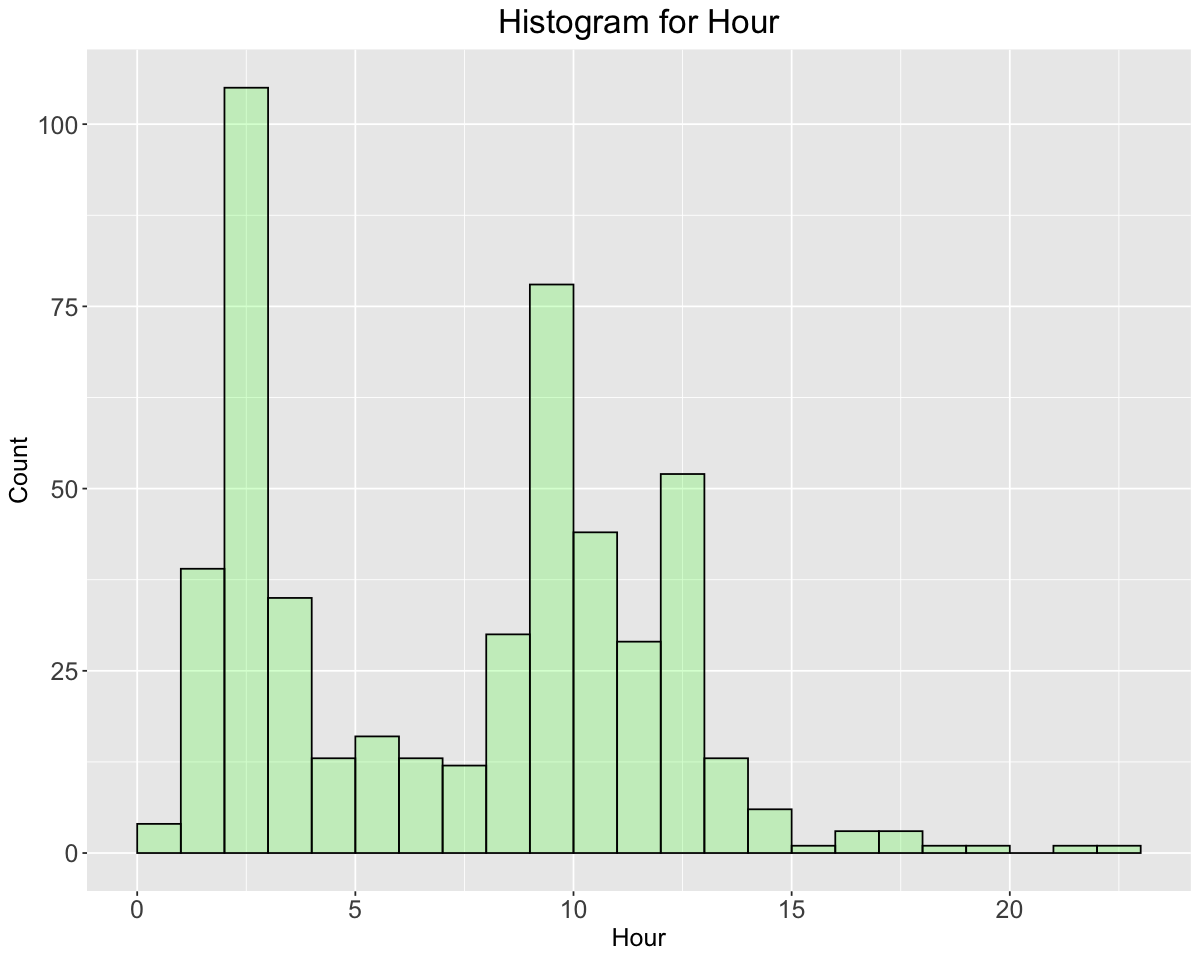

In [93]:
ggplot(data=dataset, aes(x=dataset$Hour)) + 
  geom_histogram(breaks=seq(0, 23, by = 1), 
                 col="black", 
                 fill="green", 
                 alpha = .2) + 
  labs(title="Histogram for Hour", x="Hour", y = "Count") + 
  theme(plot.title = element_text(hjust = 0.5, size=20), 
        axis.title = element_text(size=15),
        axis.text = element_text(size=15))

Histogram indicates *Hour* can be discretized into 4 parts. 

Specifically, we encode *Hour* $\in$ {2, 3, 4} to 0, *Hour* $\in$ {5, 6, 7, 8} to 1, *Hour* $\in$ {9, 10, 11, 12, 13} to 2, and *Hour* $\in$ {1, 14, 15, 16, 17, 18, 19, 20, 22, 23} to 3

In [94]:
tmp = rep(NA, 500)

for(i in 1:500){
    if(dataset$Hour[i] %in% c(2,3,4)){
        tmp[i] = 0
    } else if(dataset$Hour[i] %in% c(5,6,7,8)){
        tmp[i] = 1
    } else if(dataset$Hour[i] %in% c(9,10,11,12,13)){
        tmp[i] = 2
    } else{
        tmp[i] = 3
    }  
}
    
dataset$Hour = tmp

**Weekday**

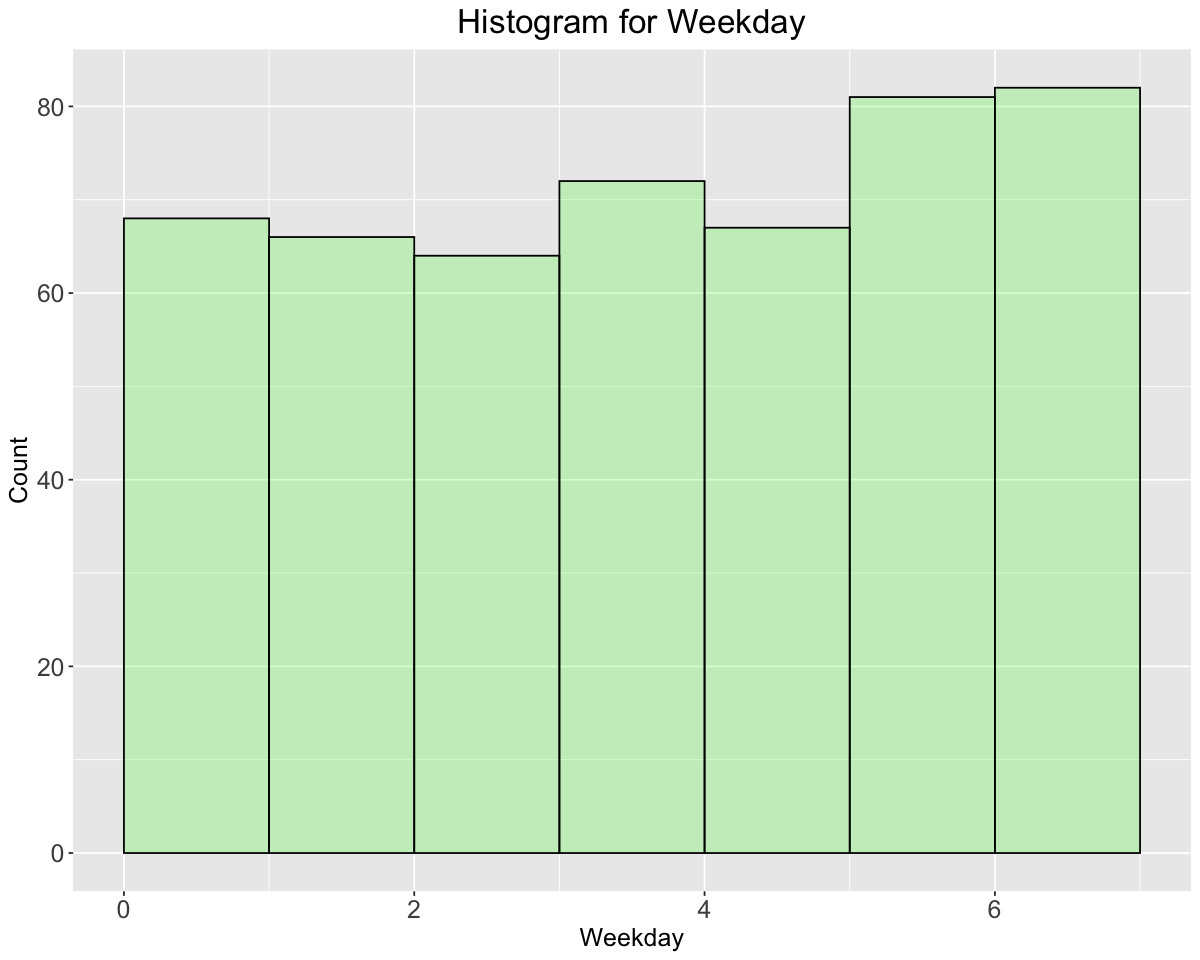

In [95]:
ggplot(data=dataset, aes(x=dataset$Weekday)) + 
  geom_histogram(breaks=seq(0, 7, by = 1), 
                 col="black", 
                 fill="green", 
                 alpha = .2) + 
  labs(title="Histogram for Weekday", x="Weekday", y = "Count") + 
  theme(plot.title = element_text(hjust = 0.5, size=20), 
        axis.title = element_text(size=15),
        axis.text = element_text(size=15))

From histogram, we find the number of post on Weekends is more than that on Weekdays. 

So, we decide to discretize *Weekday* into 2 parts.

In [96]:
dataset$Weekday = ifelse(dataset$Weekday >5, 0, 1)

### Convert numerical variables to categorical

In [97]:
dataset2 = dataset %>% mutate_at(names(dataset)[3:7], as.factor)

In [98]:
summary(dataset2)

     Total            Type     Category     Month     Weekday Hour   
 Min.   : 81370   Link  : 22   1:215    10     : 60   0:163   0:179  
 1st Qu.:112676   Photo :426   2:130    7      : 52   1:337   1: 54  
 Median :129600   Status: 45   3:155    4      : 50           2:233  
 Mean   :123194   Video :  7            12     : 50           3: 34  
 3rd Qu.:136393                         6      : 49                  
 Max.   :139441                         11     : 45                  
                                        (Other):194                  
   Paid         Reach          Impression          Engage       
 0   :360   Min.   :   238   Min.   :    570   Min.   :    9.0  
 1   :139   1st Qu.:  3315   1st Qu.:   5695   1st Qu.:  393.8  
 NA's:  1   Median :  5281   Median :   9051   Median :  625.5  
            Mean   : 13903   Mean   :  29586   Mean   :  920.3  
            3rd Qu.: 13168   3rd Qu.:  22086   3rd Qu.: 1062.0  
            Max.   :180480   Max.   :1110282   Max

Summary statistics of the data shows that predictors *Paid*, *Like*, and *Share* include missing values.

### Missing values imputation

We use KNN to impute the missing values with K=5.

In [99]:
dataset3 = knnImputation(dataset2, k=5, meth="weigAvg")

### Add small number to numerical variables

From summary statistics of the data, some numerical variables have value 0. so, we add 2 to each numerical variables in order to obtain robust estimation and prediction.

In [100]:
dataset3[,c(1,8:19)] = dataset3[,c(1,8:19)] + 2

## Part3. Explorary Data Analyasis (EDA)

### 1. Scatterplot and Outlier Detection

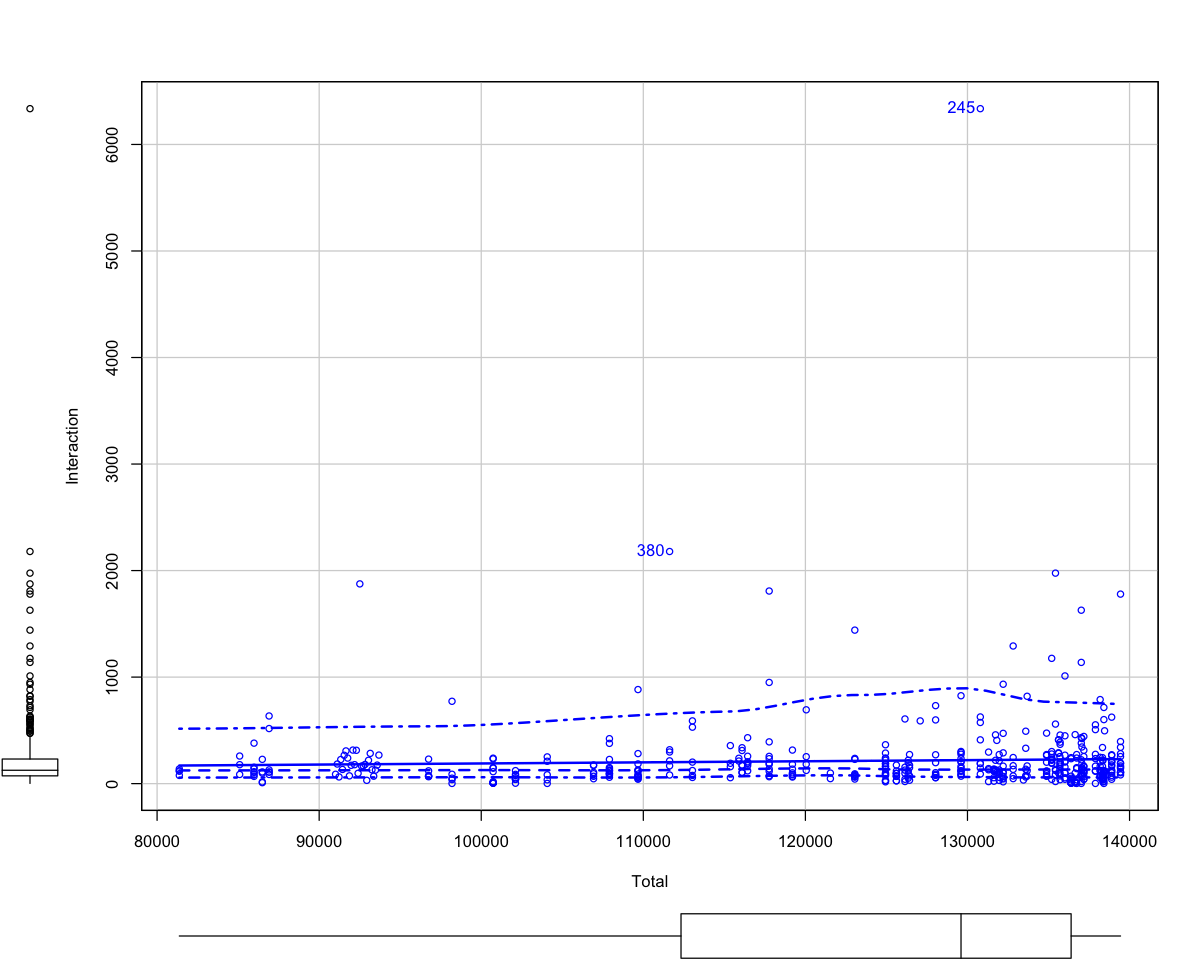

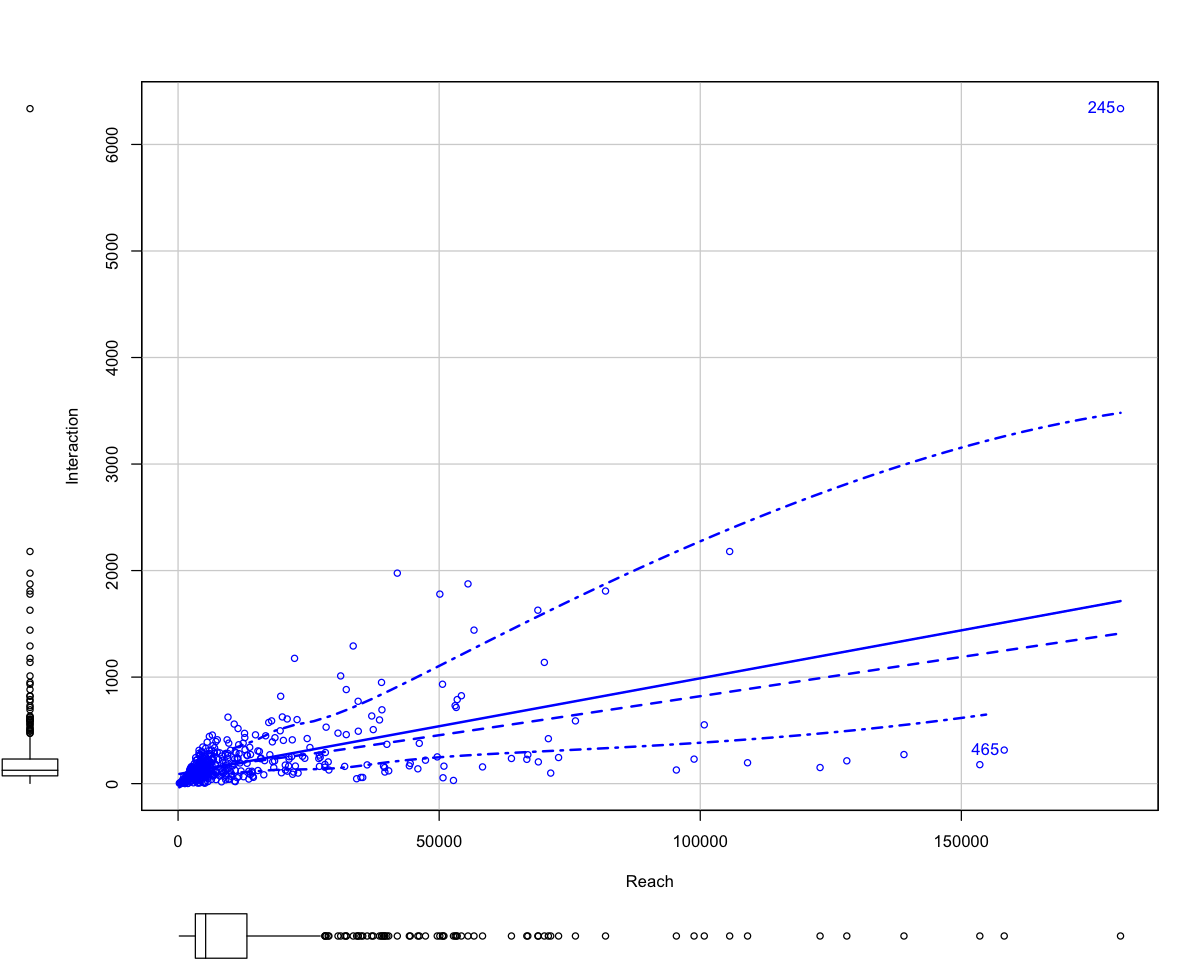

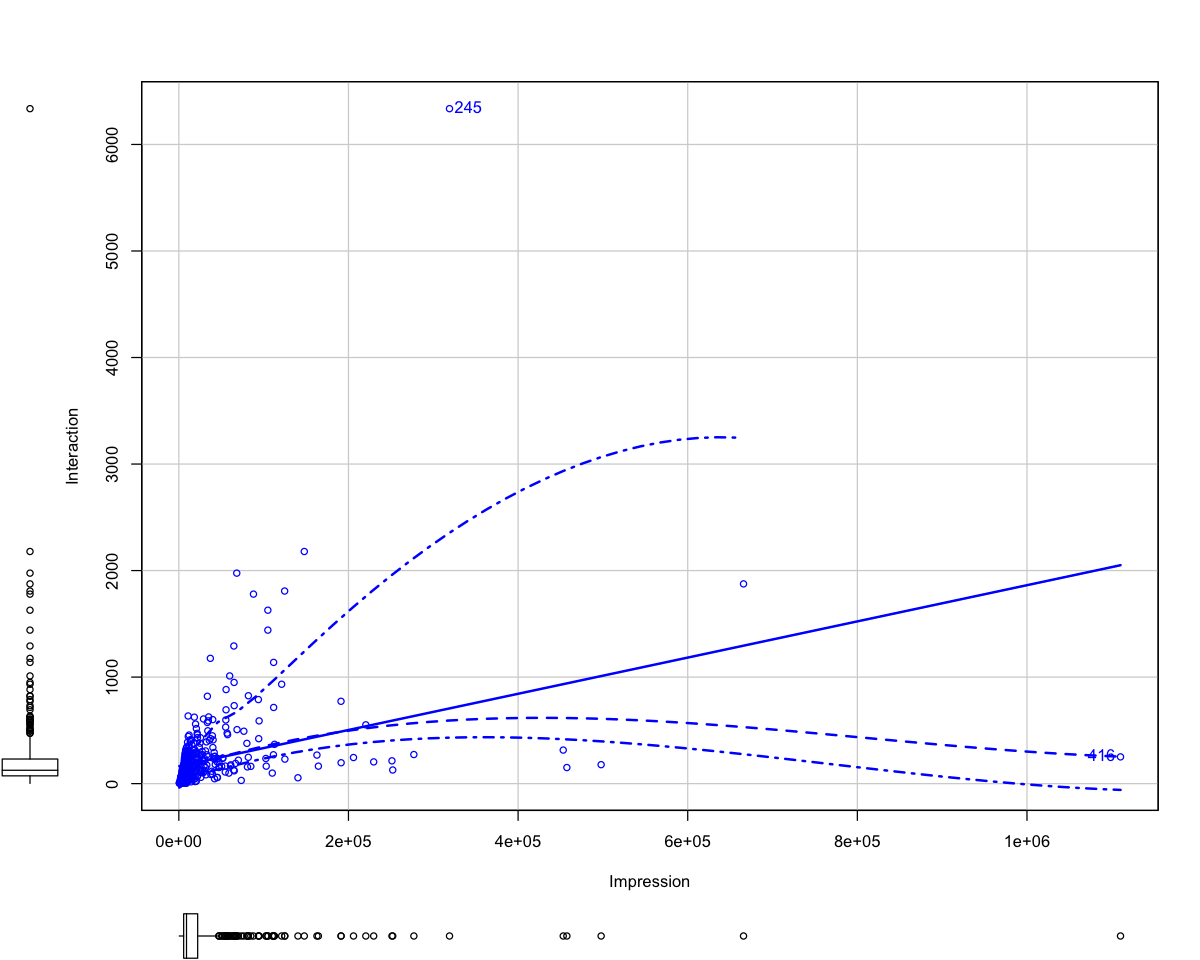

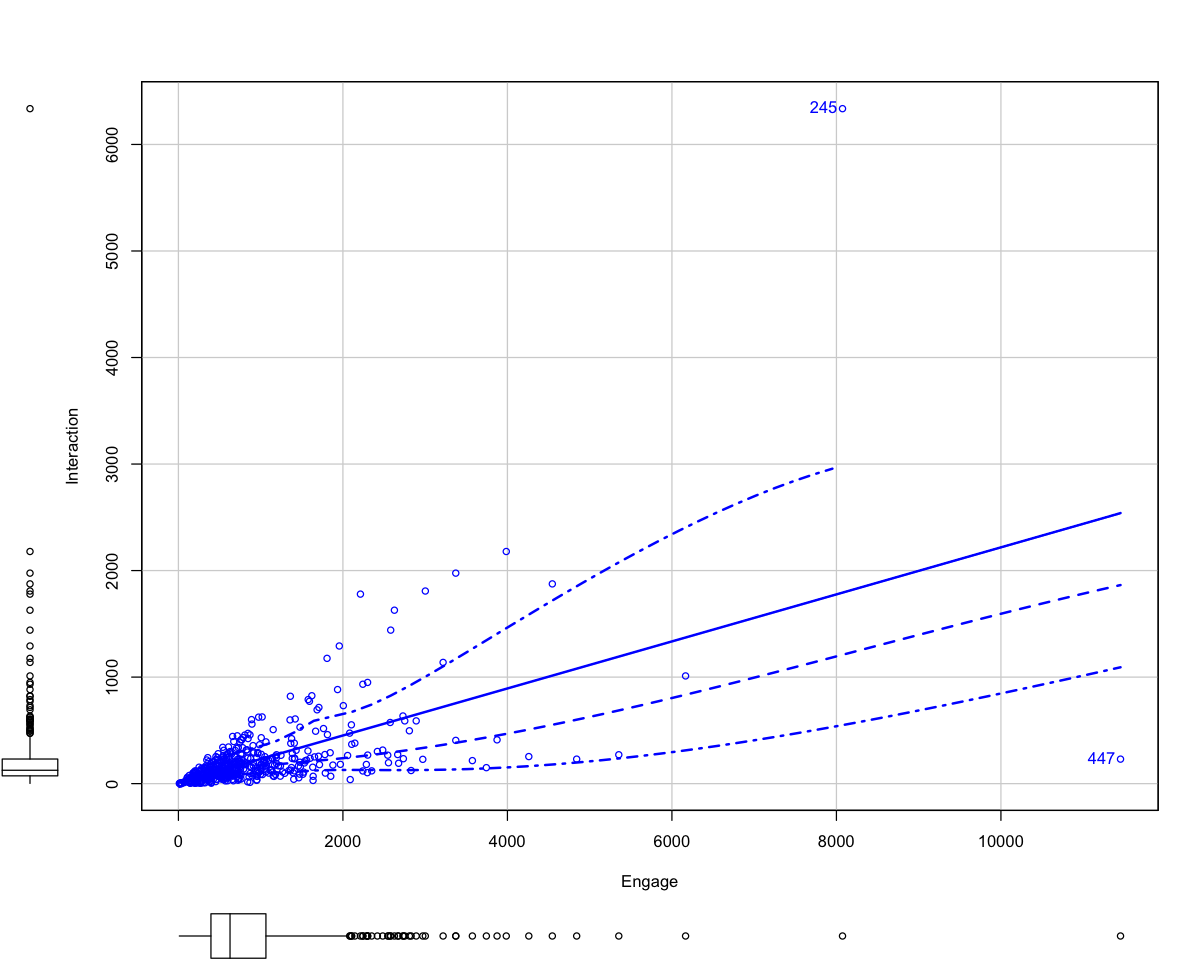

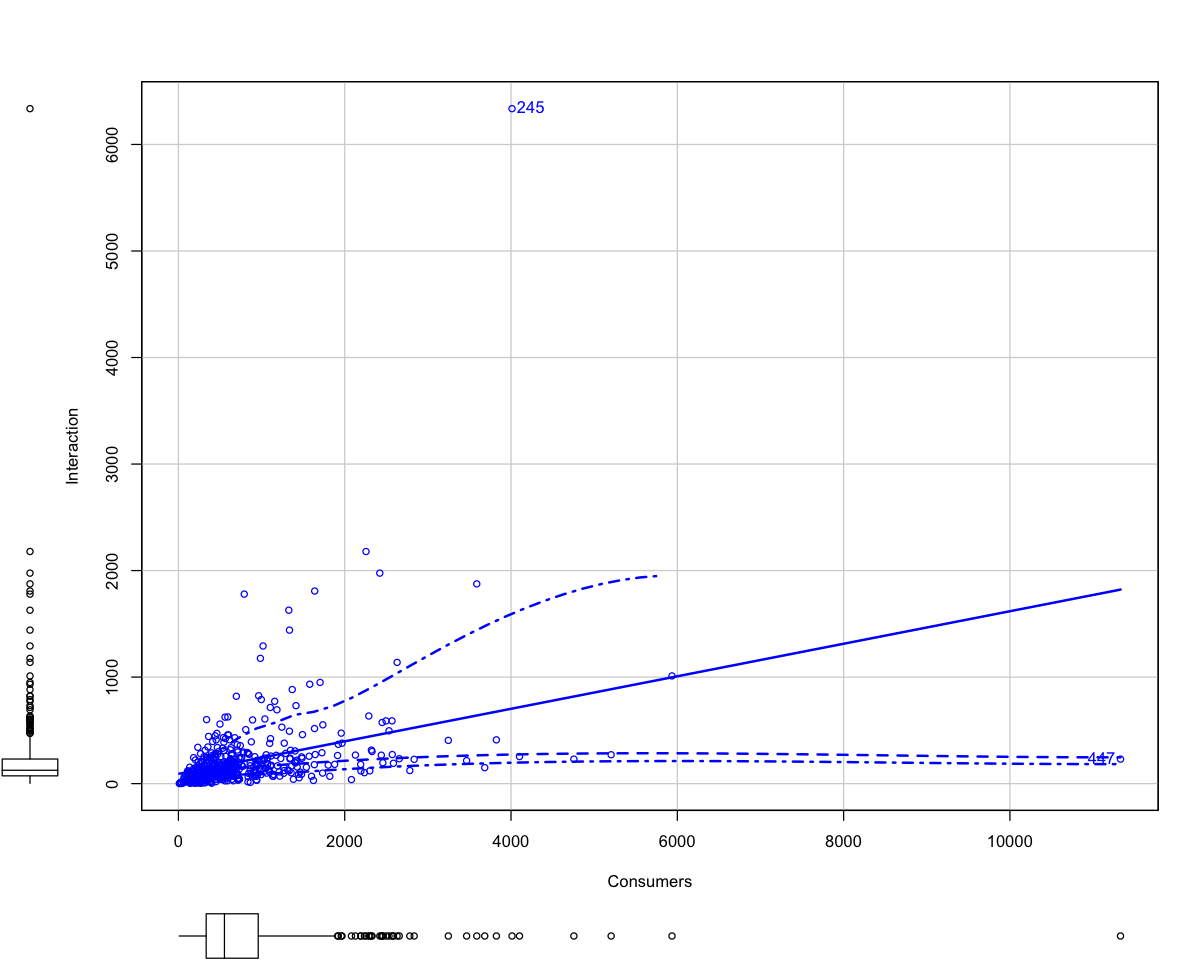

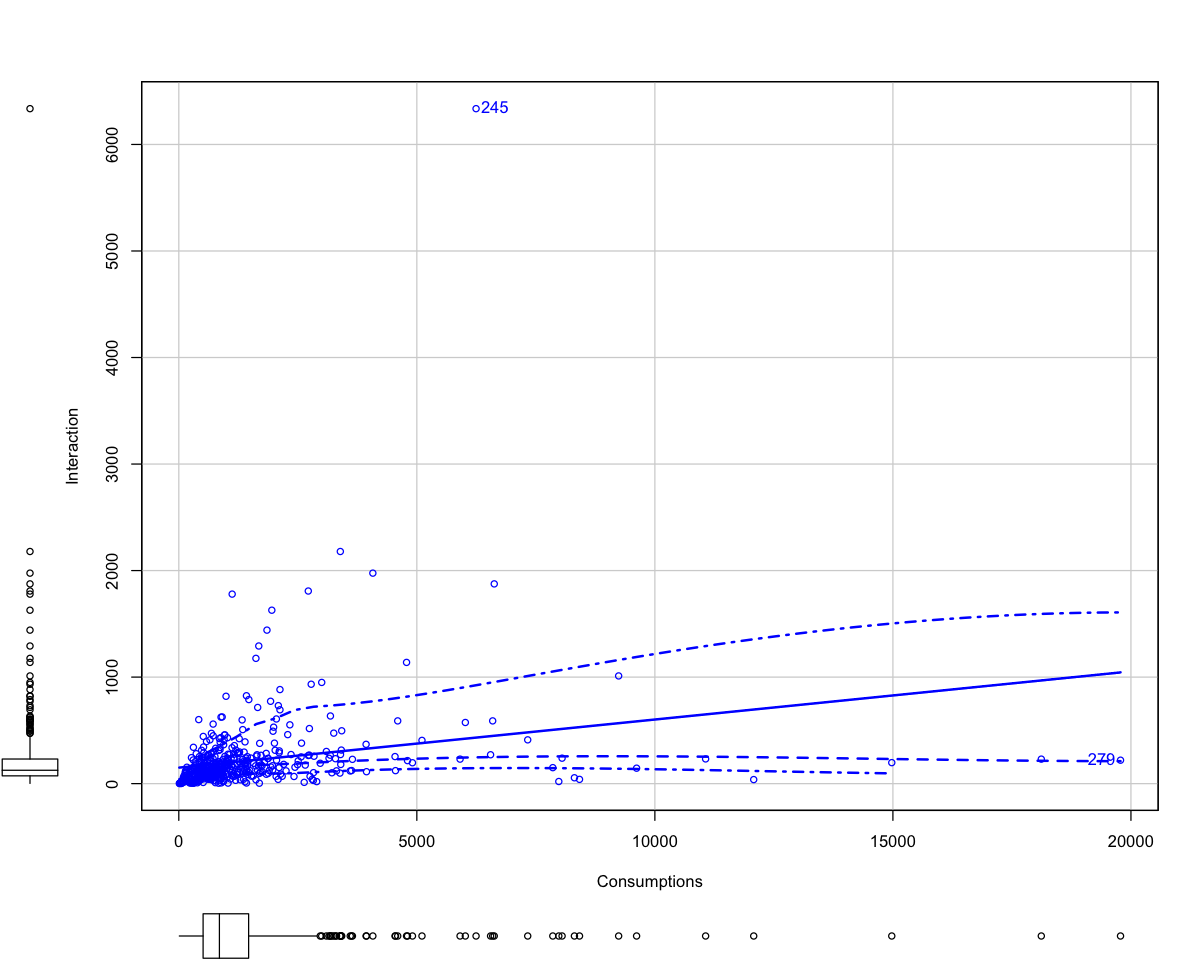

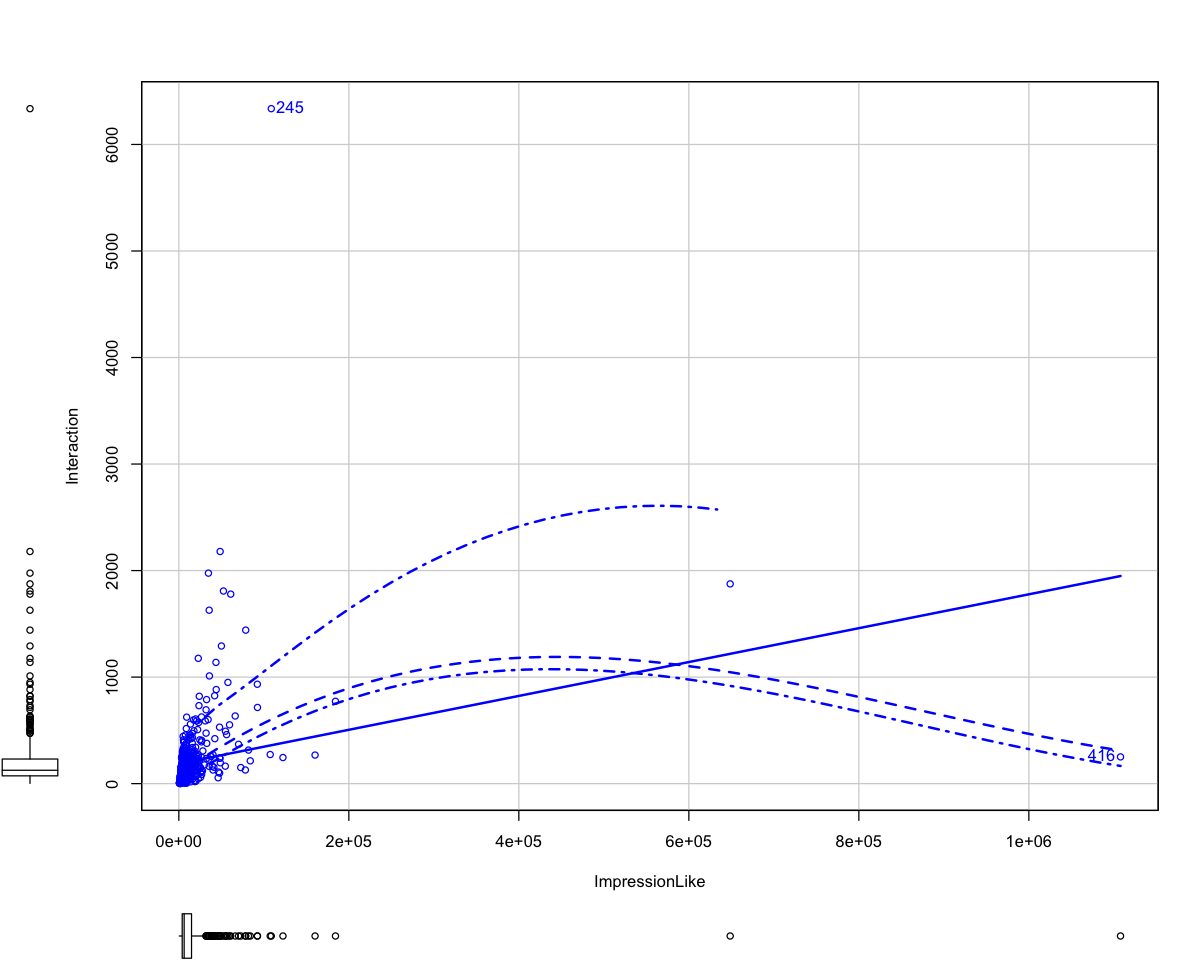

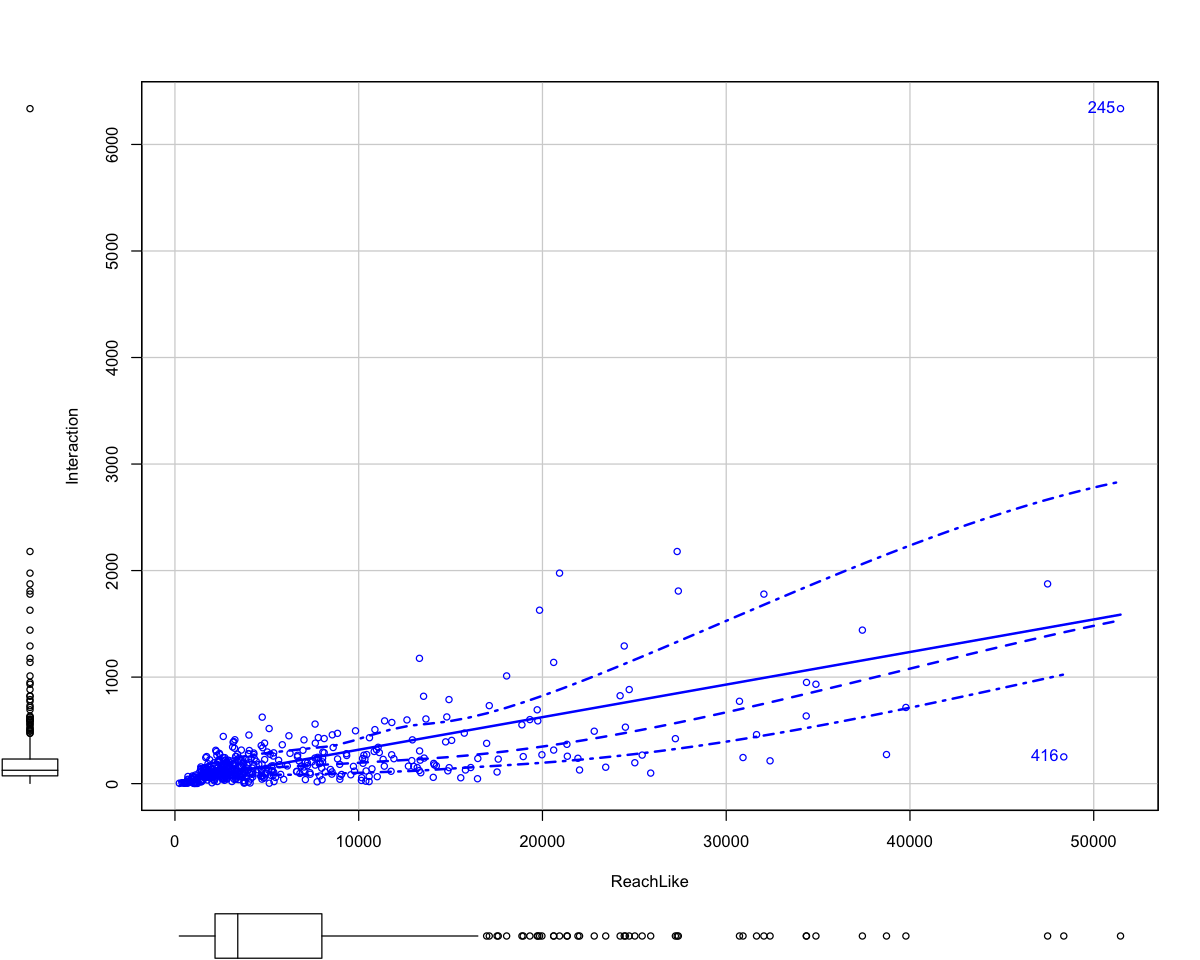

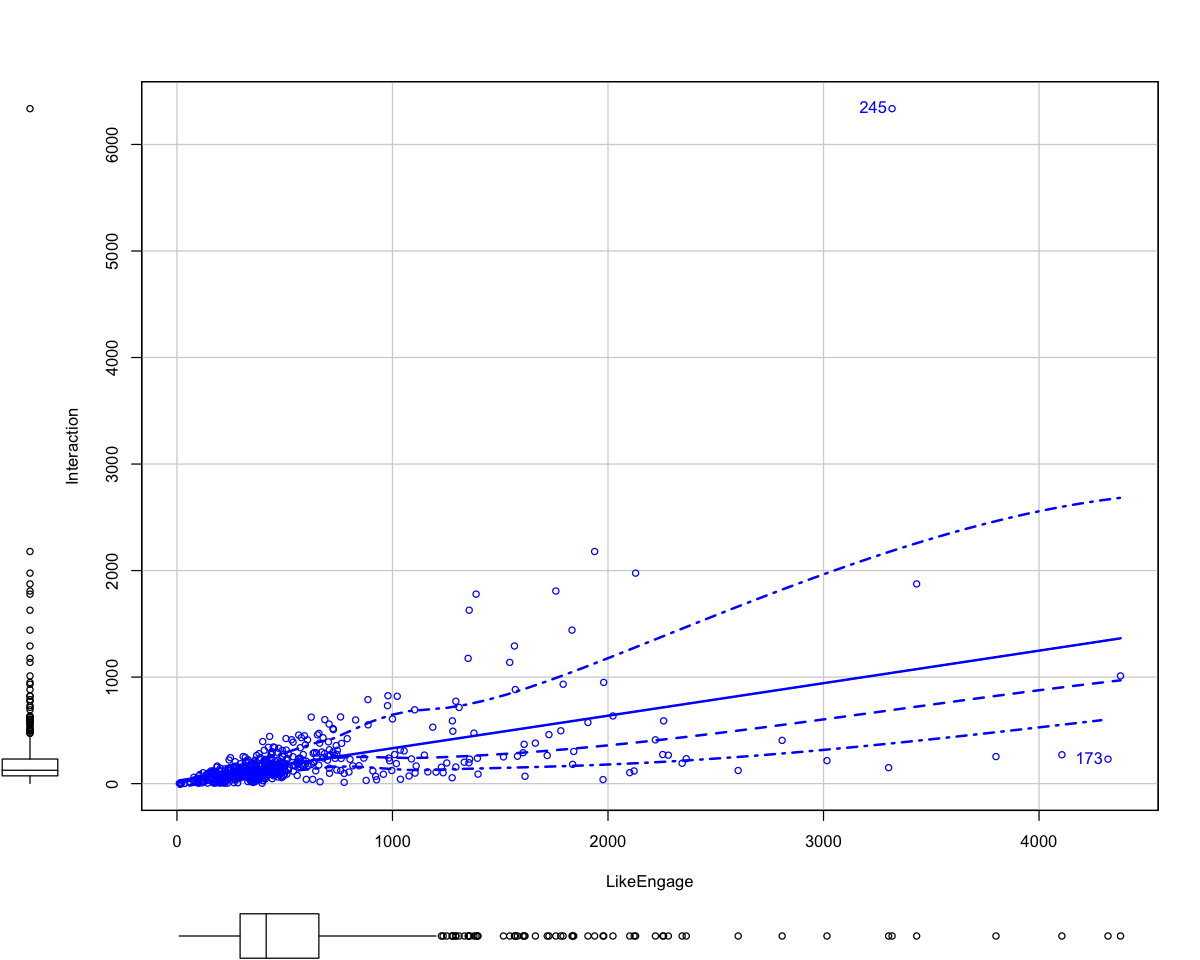

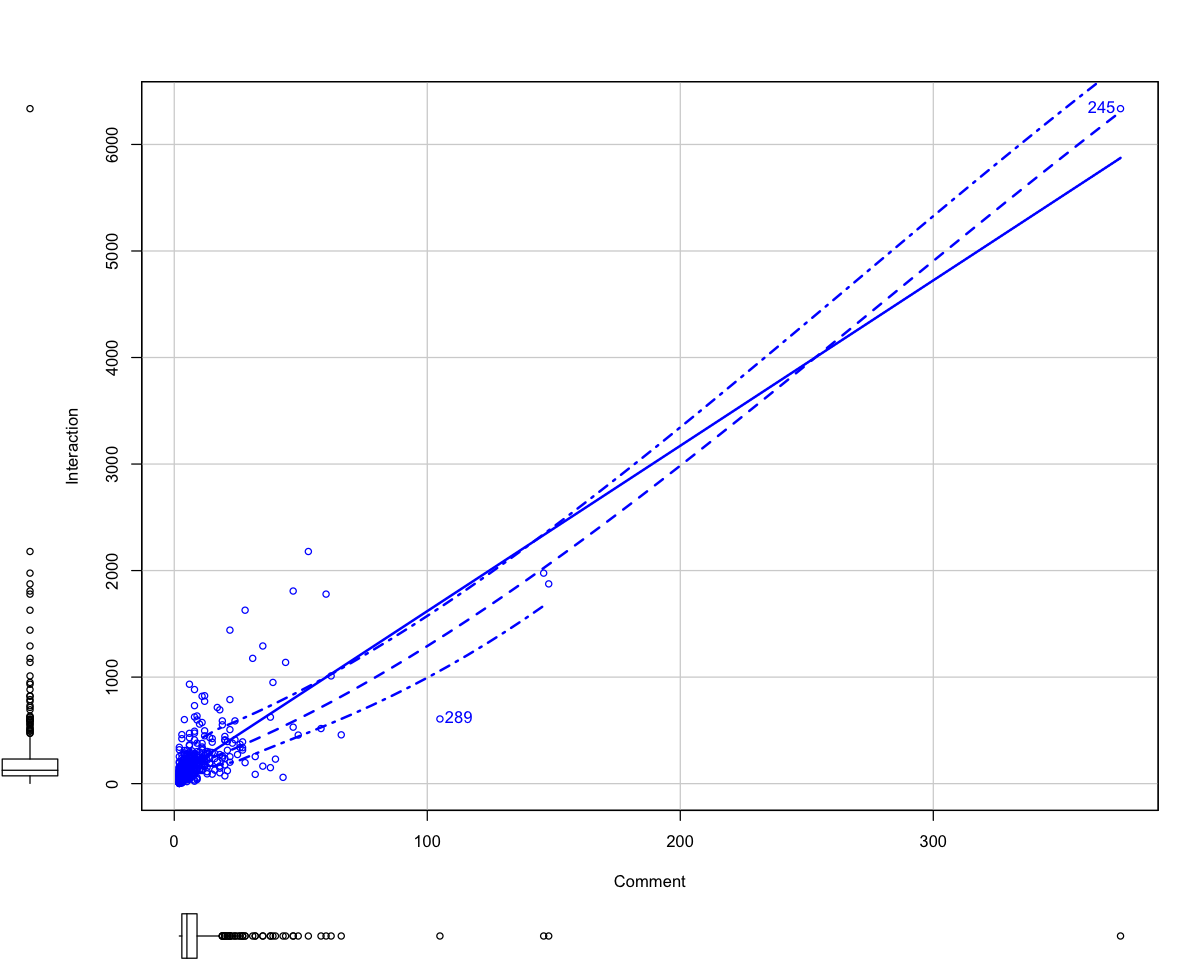

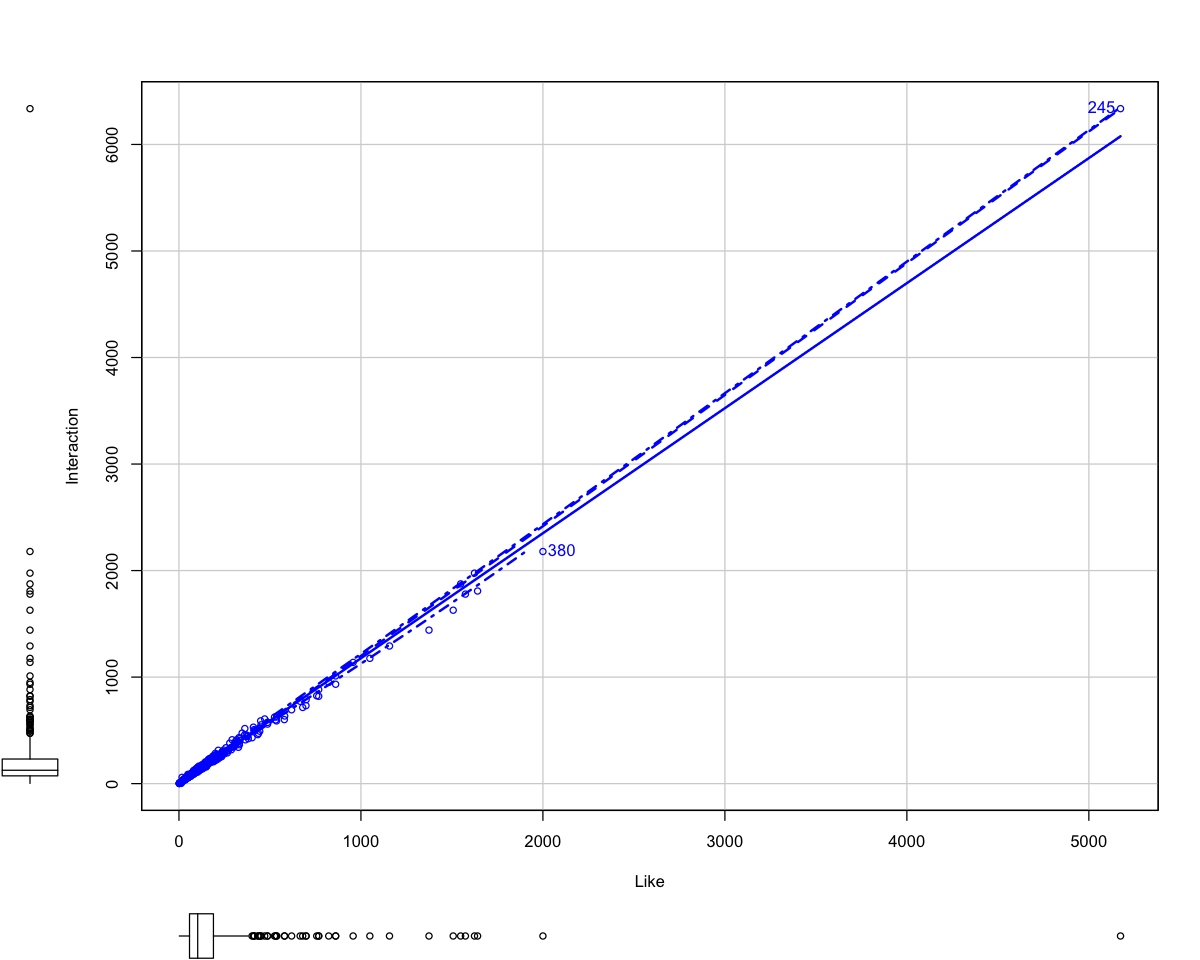

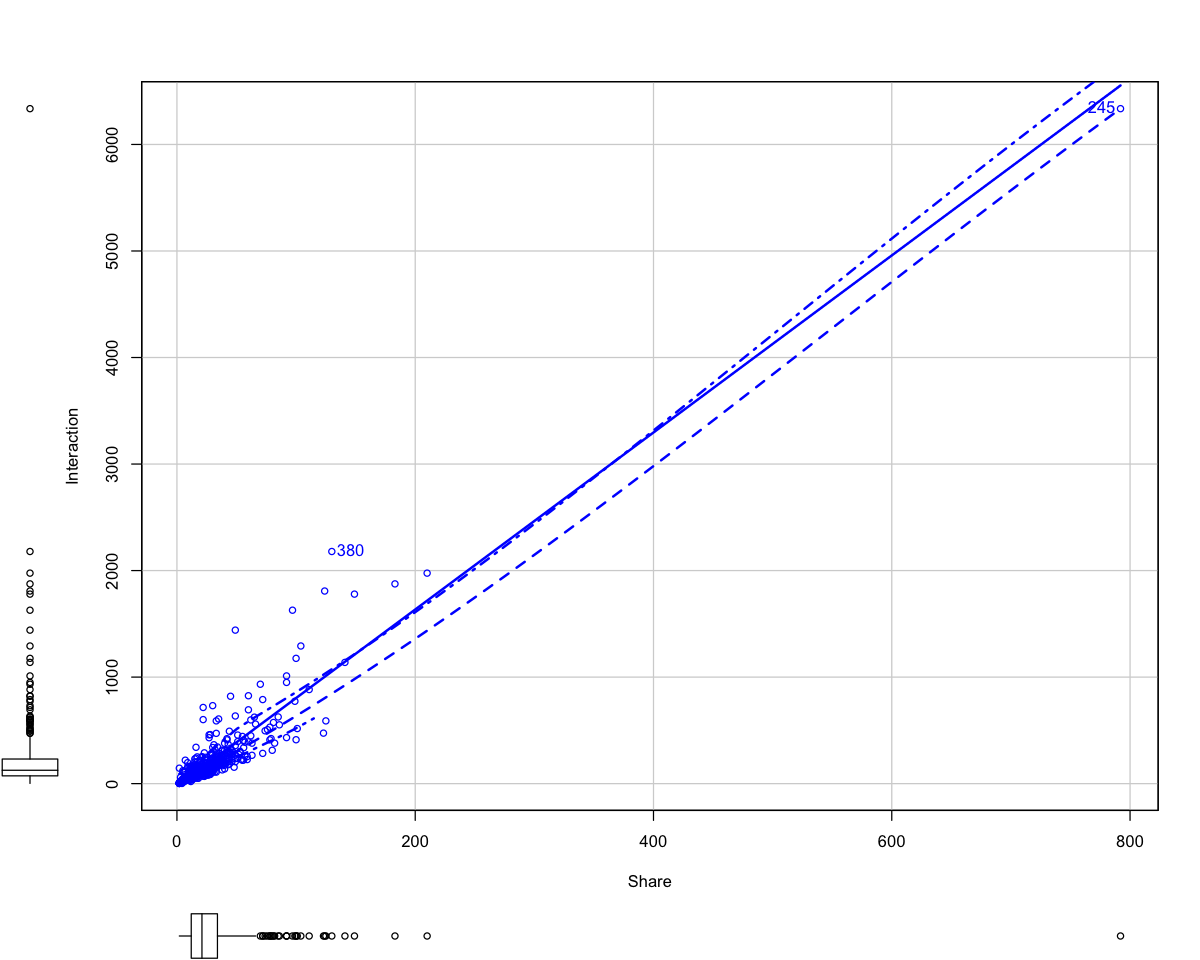

In [105]:
for(i in c(1,8:18)){
  scatterplot(Interaction~dataset3[,i], data=dataset3, id=T, xlab=names(dataset3)[i])
}

From scatterplot, it seems that point 245 is an outlier and we delete it. 

In [19]:
dataset3[245,]

Total  Type  Category Month Weekday Hour Paid Reach  Impression Engage
245 130793 Photo 2        7     1       1    1    180482 319135     8074  
    Consumers Consumptions ImpressionLike ReachLike LikeEngage Comment Like
245 4012      6244         108754         51458     3318       374     5174
    Share Interaction
245 792   6336

In [20]:
dataset3 = dataset3[-245,]

### 2. Histogram, Kernel Density Estimation, and Variable Transformation

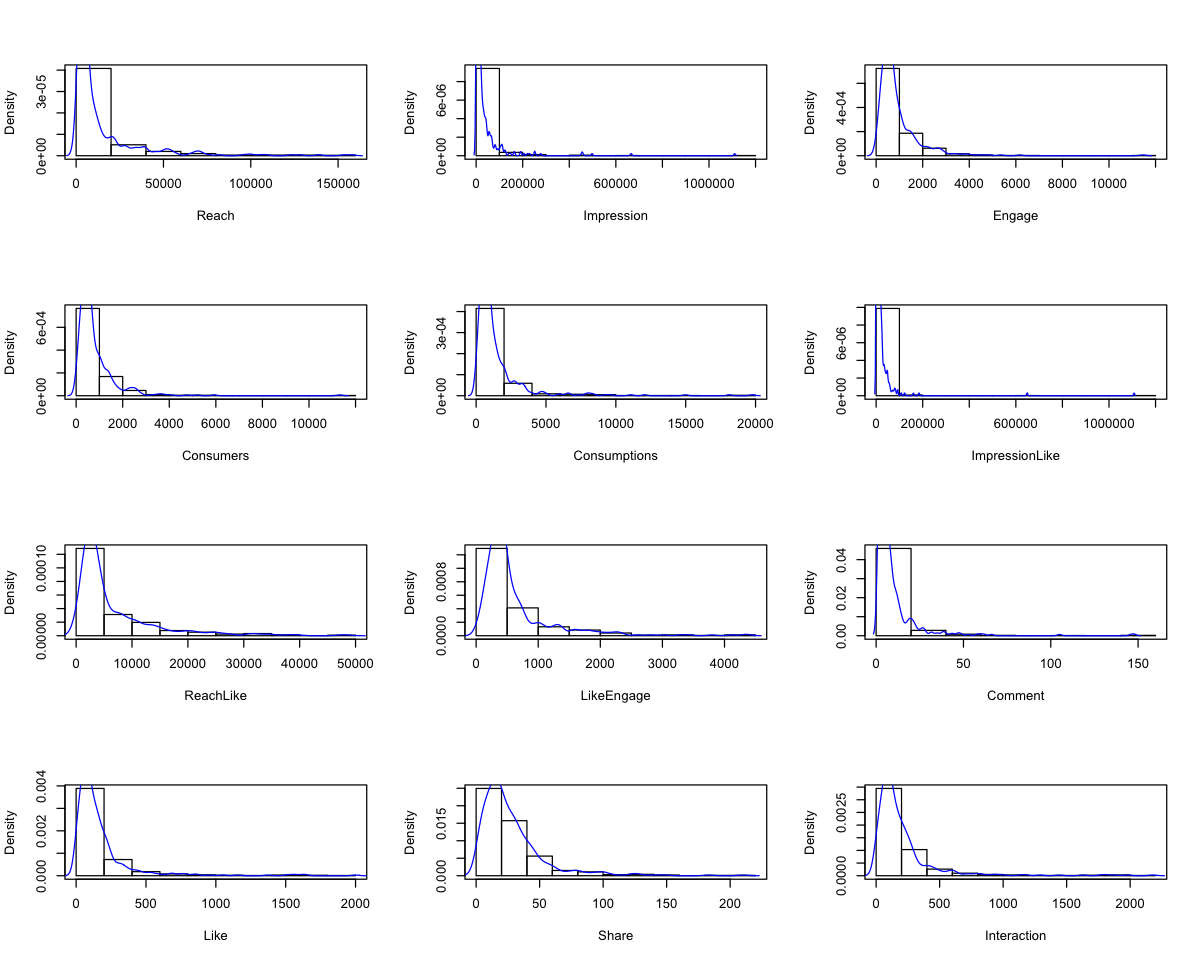

In [21]:
par(mfrow=c(4,3))
for(i in 8:19){
  hist(dataset3[,i],freq=F, xlab=names(dataset3[i]),main="")
  box()
  lines(density(dataset3[,i]),col="blue")
}

From histogram and kernel density estimation of numerical predictors, we find all of them are right-skewed. In order to improve the performance of estimation and prediction, we take log-transformation and hope the transformed distribution is approximately normal.

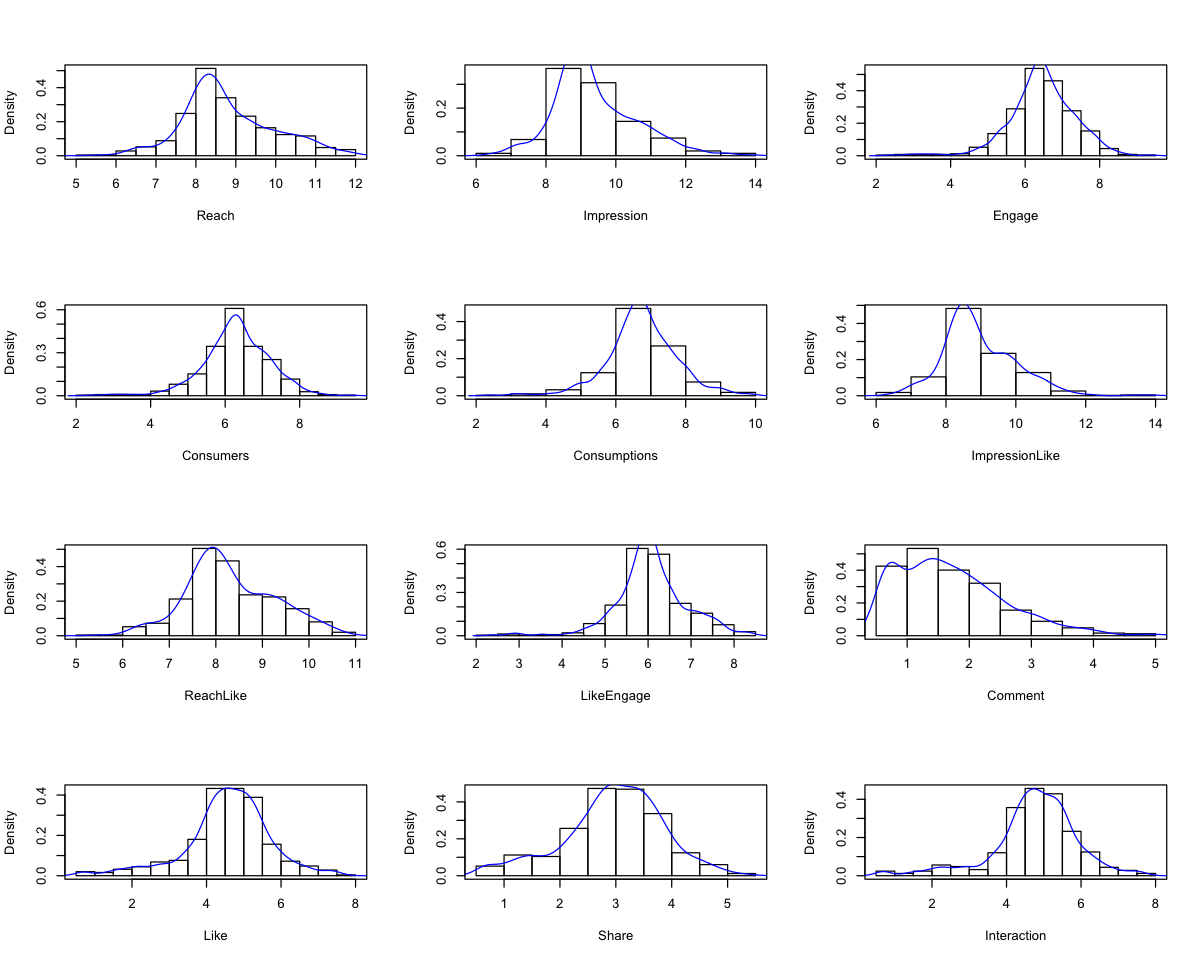

In [22]:
par(mfrow=c(4,3))
for(i in 8:19){
  hist(log(dataset3[,i]), freq=F, xlab=names(dataset3[i]), main="")
  box()
  lines(density(log(dataset3[,i])), col="blue")
}

From histograms and kernel density estimation of transformed predictors, the distributions of most of them are approximately normal.

In [23]:
dataset4 = cbind(dataset3[,1:7], log(dataset3[,8:19]))

In [24]:
summary(dataset4)

     Total            Type     Category     Month     Weekday Hour    Paid   
 Min.   : 81372   Link  : 22   1:215    10     : 60   0:163   0:179   0:361  
 1st Qu.:112326   Photo :425   2:129    7      : 51   1:336   1: 53   1:138  
 Median :129602   Status: 45   3:155    4      : 50           2:233          
 Mean   :123181   Video :  7            12     : 50           3: 34          
 3rd Qu.:136395                         6      : 49                          
 Max.   :139443                         11     : 45                          
                                        (Other):194                          
     Reach          Impression         Engage        Consumers    
 Min.   : 5.481   Min.   : 6.349   Min.   :2.398   Min.   :2.398  
 1st Qu.: 8.105   1st Qu.: 8.647   1st Qu.:5.980   1st Qu.:5.811  
 Median : 8.572   Median : 9.109   Median :6.441   Median :6.312  
 Mean   : 8.799   Mean   : 9.374   Mean   :6.460   Mean   :6.304  
 3rd Qu.: 9.472   3rd Qu.: 9.995   3rd Qu

### 3. Boxplot

In [25]:
head(dataset4)

Total  Type   Category Month Weekday Hour Paid Reach     Impression Engage  
1 139443 Photo  2        12    1       0    0     7.920810  8.535622  5.192957
2 139443 Status 2        12    1       2    0     9.255505  9.855295  7.285507
3 139443 Photo  3        12    1       0    0     7.789455  8.383662  5.187386
4 139443 Photo  2        12    1       2    1    10.822375 11.385013  7.702104
5 139443 Photo  2        12    1       0    0     8.888205  9.517531  6.511745
6 139443 Status 2        12    1       2    0     9.256651  9.945157  7.084226
  Consumers Consumptions ImpressionLike ReachLike LikeEngage Comment   Like    
1 4.709530  5.081404      8.032685       7.403670 4.795791   1.7917595 4.394449
2 7.217443  7.424165      9.368369       8.718337 7.012115   1.9459101 4.882802
3 4.744932  5.049856      7.942362       7.316548 4.897840   0.6931472 4.219508
4 6.674561  7.021976     11.019104      10.375052 7.235619   4.0943446 7.361375
5 6.021023  6.366470      8.737132       8.071531 5.986452   3.0445224 5.789960
6 6.980076  7.237778      9.682591       8.968778 6.925595   1.0986123 5.036953
  Share    Interaction
1 2.944439 4.624973   
2 3.433987 5.111988   
3 2.772589 4.406719   
4 5.003946 7.483807   
5 3.931826 5.978886   
6 3.555348 5.236442

**Type :**

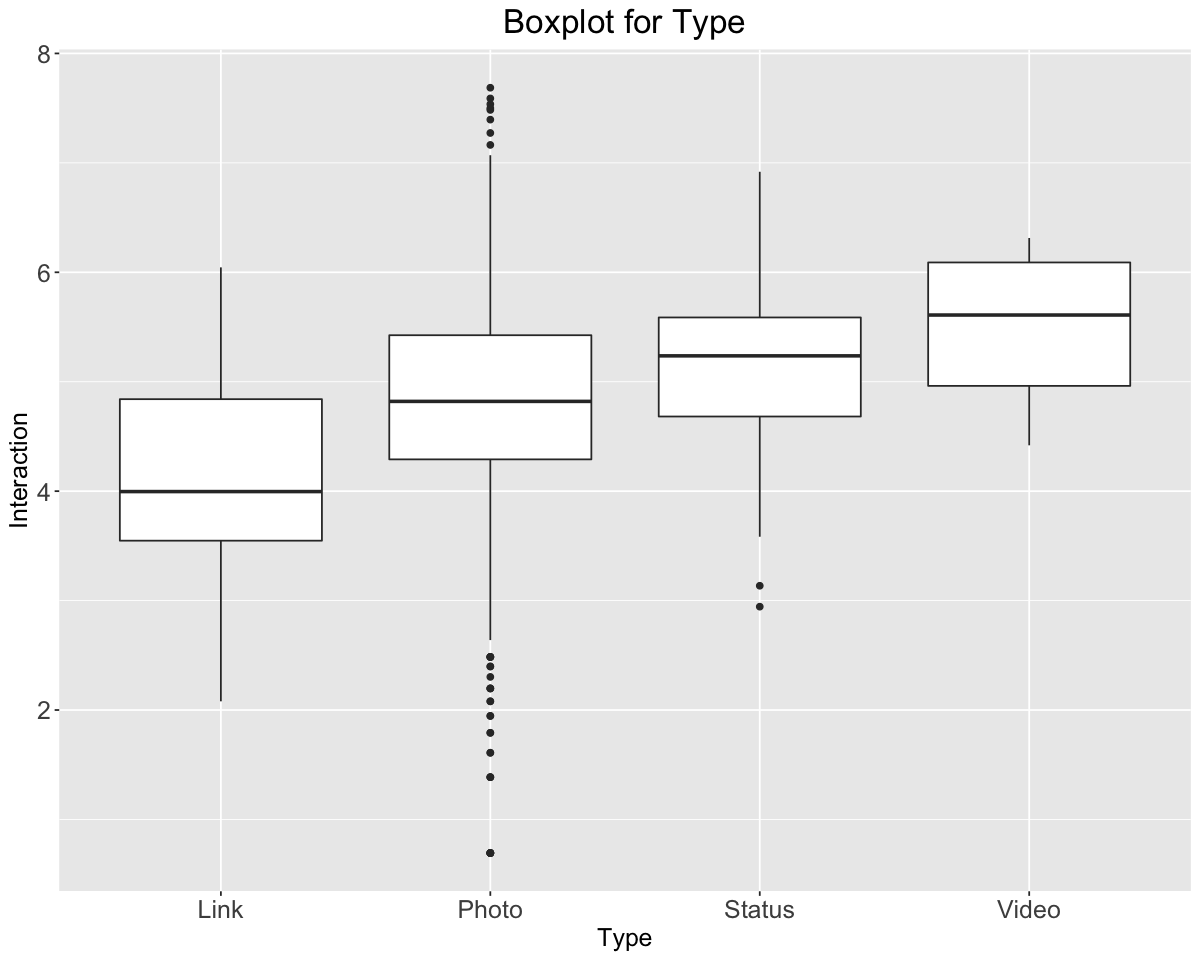

In [26]:
ggplot(data=dataset4, aes(x=Type, y=Interaction)) + 
  geom_boxplot() + 
  labs(title="Boxplot for Type", x="Type", y = "Interaction") + 
  theme(plot.title = element_text(hjust = 0.5, size=20), 
        axis.title = element_text(size=15),
        axis.text = element_text(size=15))

From boxplot of *Type*, there is an increase trend of the number of *Interaction* from level Link to level Video. Also, it seems that there is no obvious difference between these levels.

**Category :**

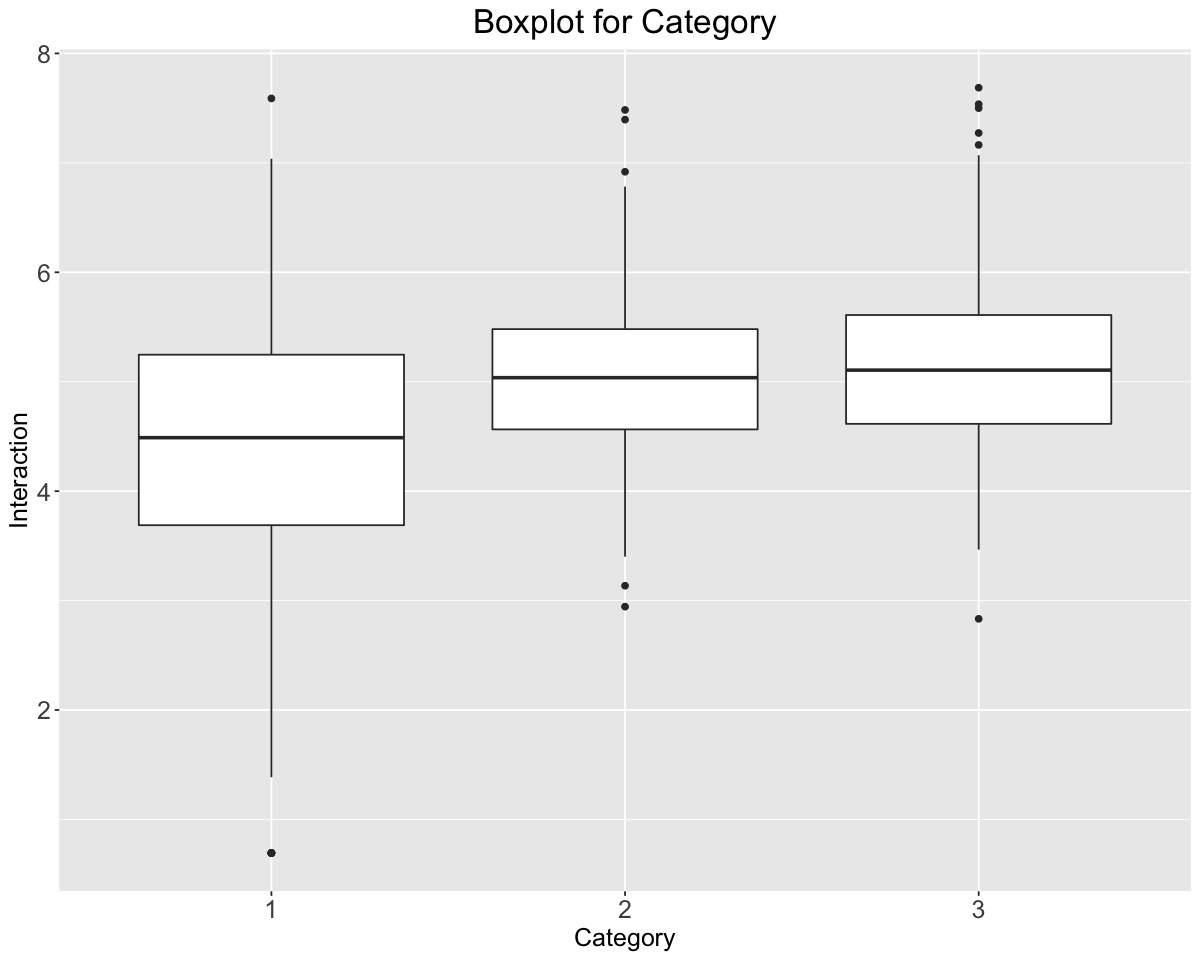

In [27]:
ggplot(data=dataset4, aes(x=Category, y=Interaction)) + 
  geom_boxplot() + 
  labs(title="Boxplot for Category", x="Category", y = "Interaction") + 
  theme(plot.title = element_text(hjust = 0.5, size=20), 
        axis.title = element_text(size=15),
        axis.text = element_text(size=15))

From boxplot of *Category*, it seems there is no difference between its levels.

**Month**

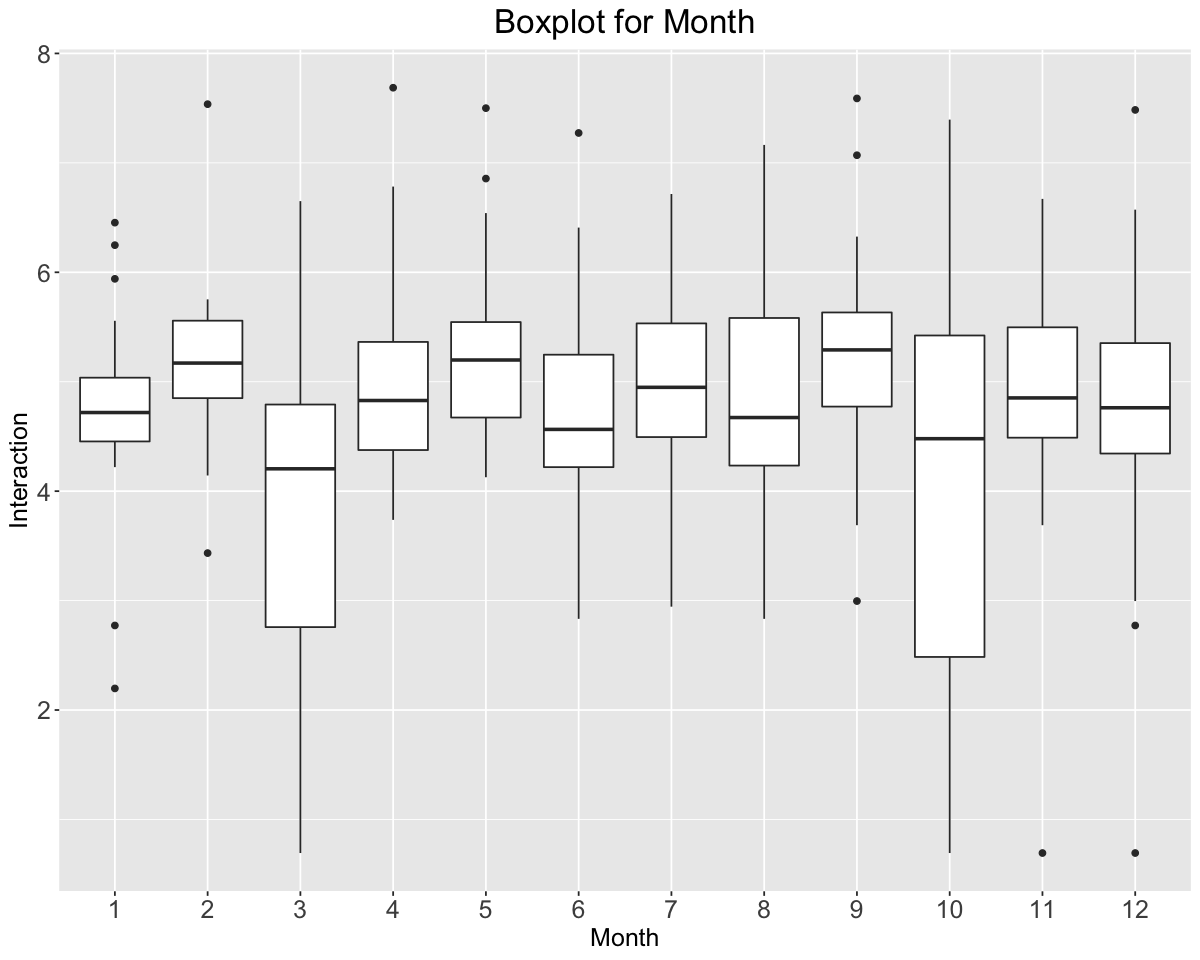

In [28]:
ggplot(data=dataset4, aes(x=Month, y=Interaction)) + 
  geom_boxplot() + 
  labs(title="Boxplot for Month", x="Month", y = "Interaction") + 
  theme(plot.title = element_text(hjust = 0.5, size=20), 
        axis.title = element_text(size=15),
        axis.text = element_text(size=15))

From boxplot of *Month*, levels March and October has larger variance than the other months. Also, it seems there is no difference between these levels.

**Weekday**

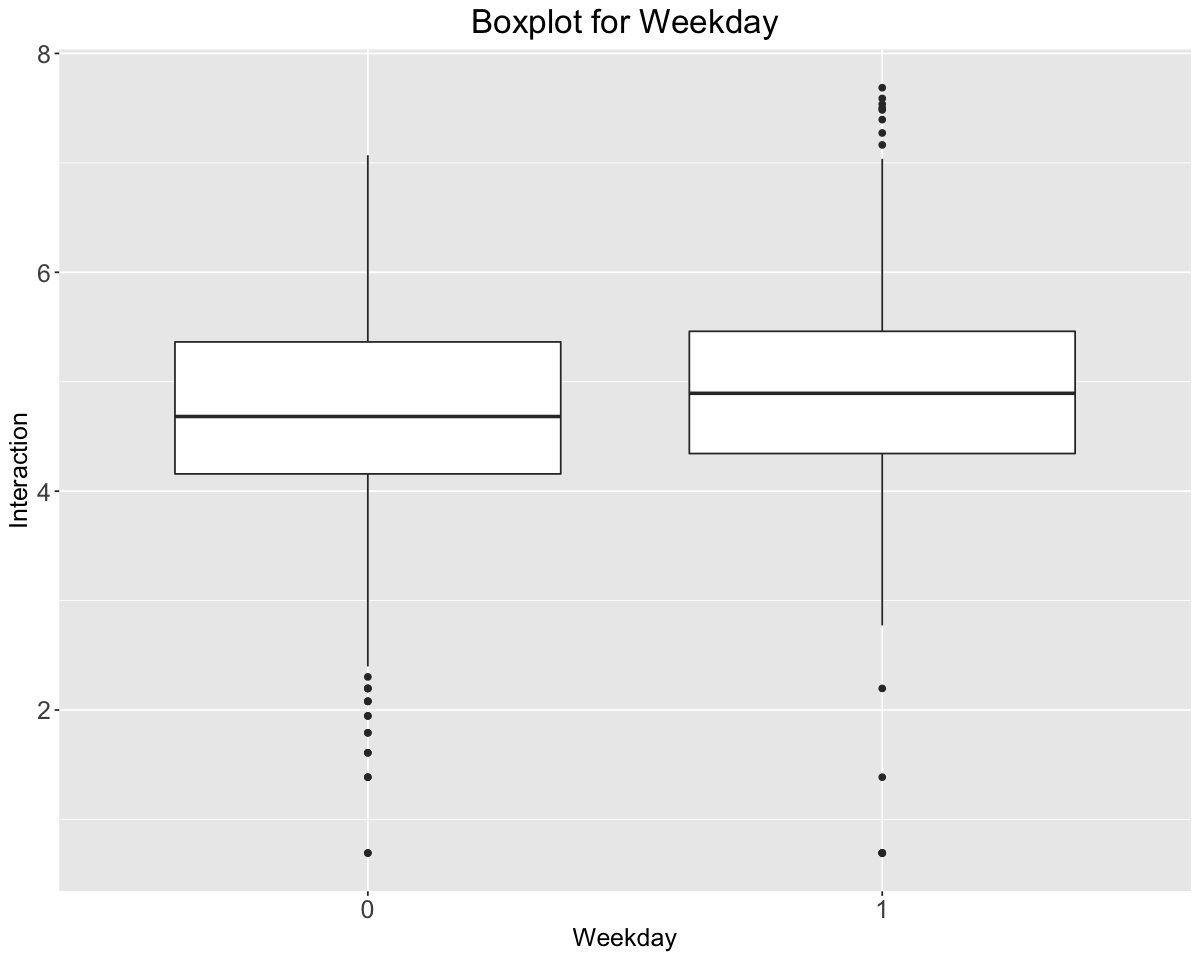

In [29]:
ggplot(data=dataset4, aes(x=Weekday, y=Interaction)) + 
  geom_boxplot() + 
  labs(title="Boxplot for Weekday", x="Weekday", y = "Interaction") + 
  theme(plot.title = element_text(hjust = 0.5, size=20), 
        axis.title = element_text(size=15),
        axis.text = element_text(size=15))

From boxplot of *Weekday*, it seems there is no difference between its levels.

**Hour**

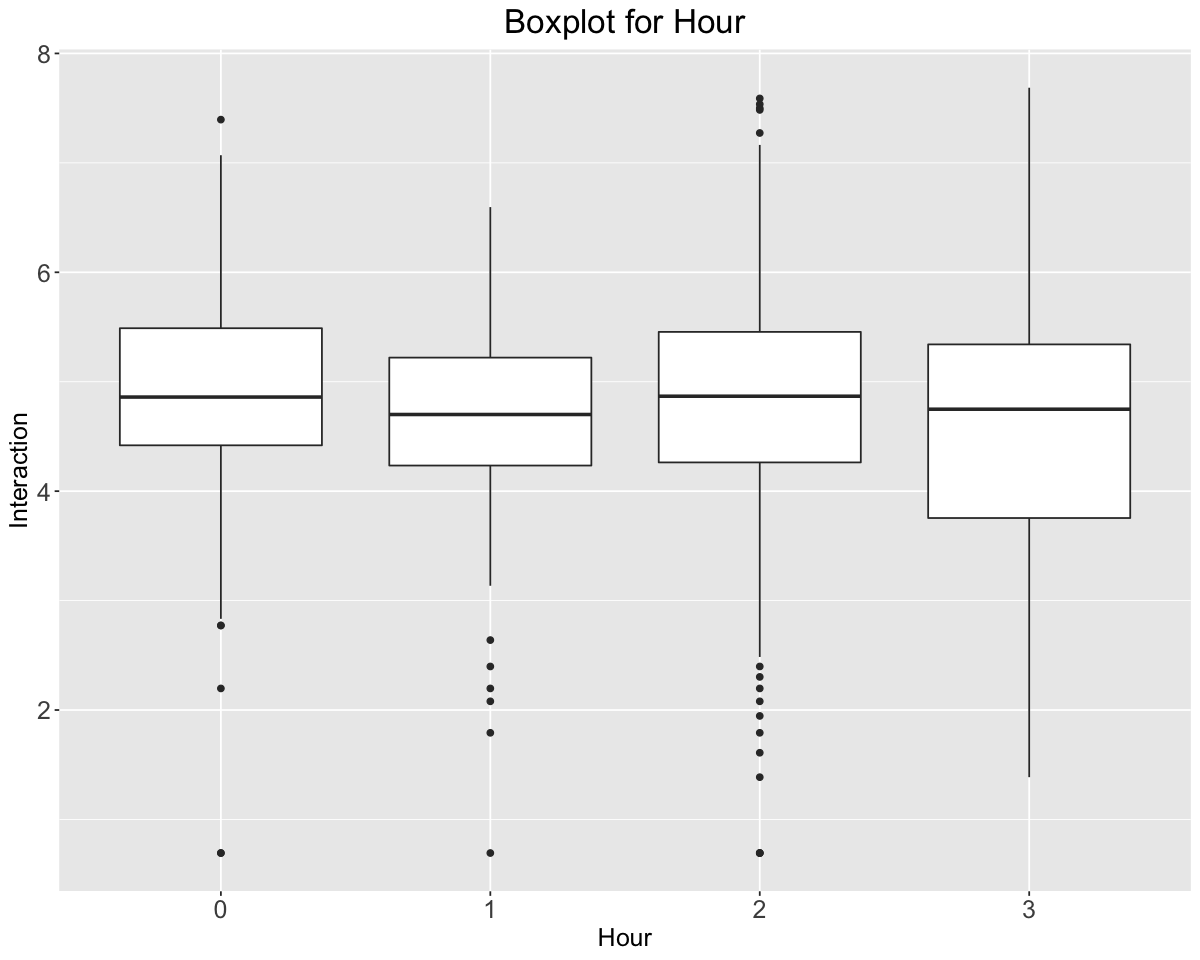

In [30]:
ggplot(data=dataset4, aes(x=Hour, y=Interaction)) + 
  geom_boxplot() + 
  labs(title="Boxplot for Hour", x="Hour", y = "Interaction") + 
  theme(plot.title = element_text(hjust = 0.5, size=20), 
        axis.title = element_text(size=15),
        axis.text = element_text(size=15))

From boxplot of *Hour*, it seems there is no difference between its levels.

**Paid**

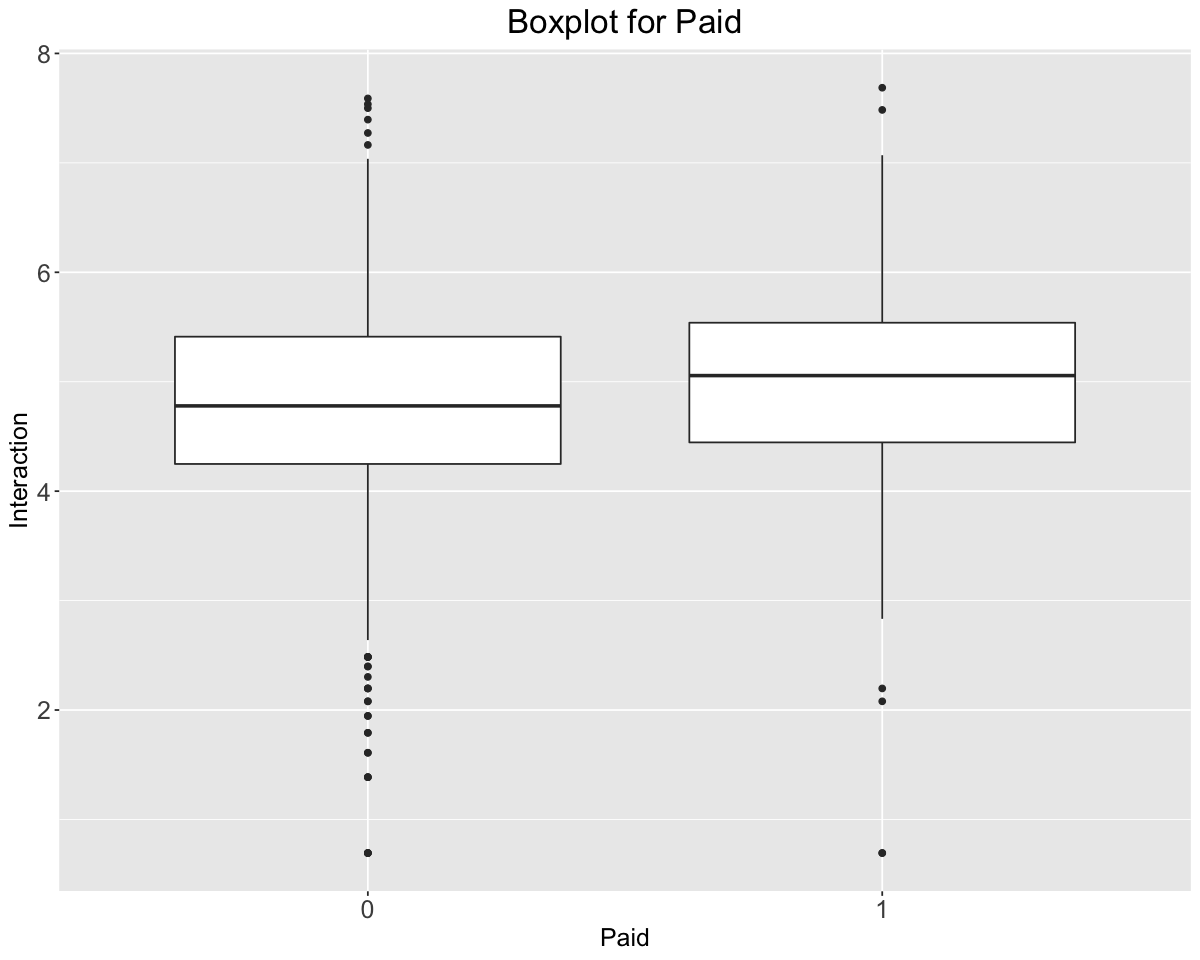

In [31]:
ggplot(data=dataset4, aes(x=Paid, y=Interaction)) + 
  geom_boxplot() + 
  labs(title="Boxplot for Paid", x="Paid", y = "Interaction") + 
  theme(plot.title = element_text(hjust = 0.5, size=20), 
        axis.title = element_text(size=15),
        axis.text = element_text(size=15))

From boxplot of *Paid*, it seems there is no difference between its levels.

### 4. PCA and Association among Numerical Predictors

In [32]:
pcaCOR = princomp(x=dataset4[,c(1,8:18)], cor=T)
summary(pcaCOR)

Importance of components:
                          Comp.1    Comp.2     Comp.3     Comp.4     Comp.5
Standard deviation     2.7969096 1.1541998 1.06706245 0.89635007 0.69891025
Proportion of Variance 0.6518919 0.1110148 0.09488519 0.06695362 0.04070629
Cumulative Proportion  0.6518919 0.7629067 0.85779190 0.92474552 0.96545181
                           Comp.6      Comp.7      Comp.8      Comp.9
Standard deviation     0.38776316 0.330183240 0.280011780 0.208311105
Proportion of Variance 0.01253002 0.009085081 0.006533883 0.003616126
Cumulative Proportion  0.97798184 0.987066917 0.993600801 0.997216927
                          Comp.10      Comp.11      Comp.12
Standard deviation     0.15319048 0.0748611109 0.0657675236
Proportion of Variance 0.00195561 0.0004670155 0.0003604473
Cumulative Proportion  0.99917254 0.9996395527 1.0000000000

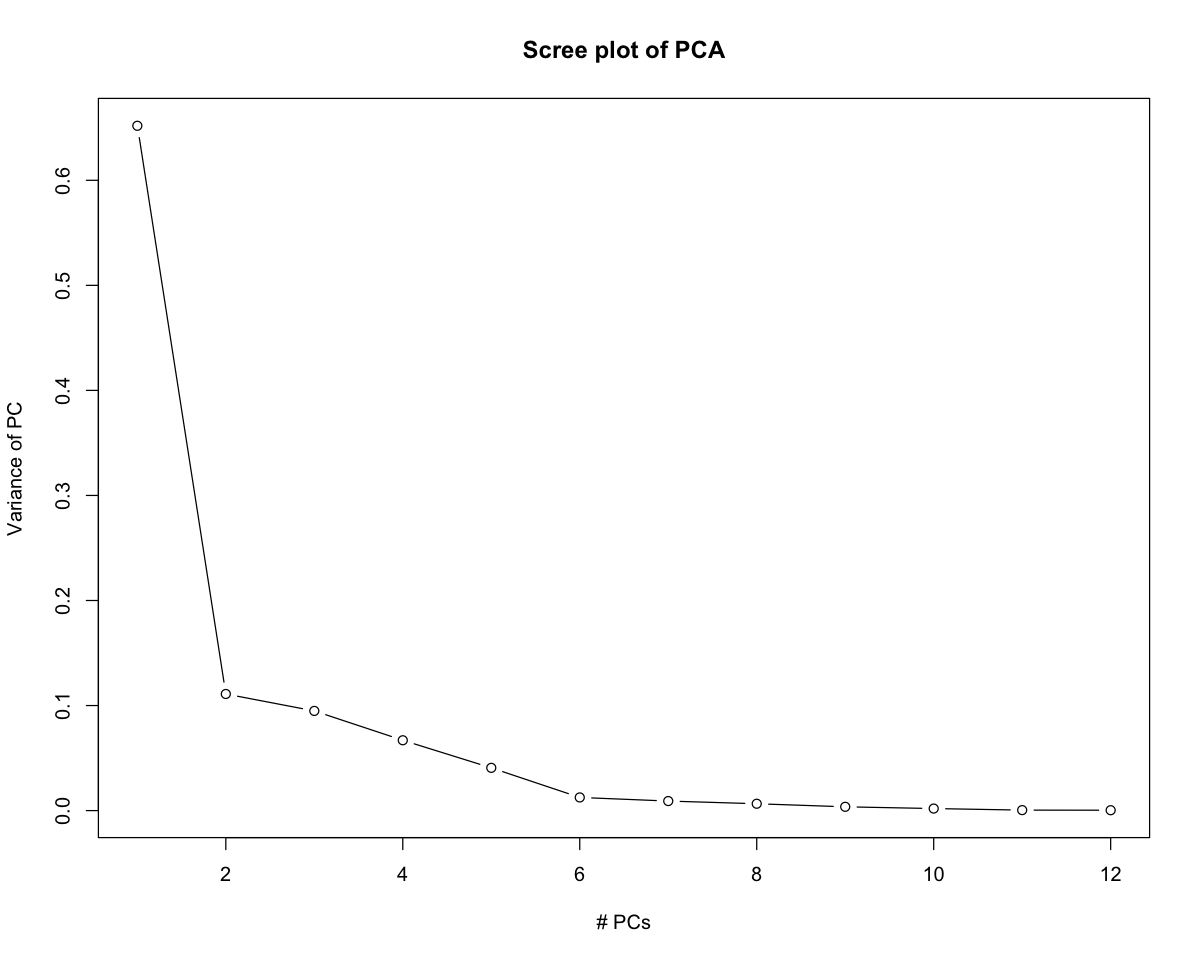

In [33]:
plot(1:12, pcaCOR$sdev^2/sum(pcaCOR$sdev^2), type="b",xlab="# PCs",ylab="Variance of PC",main="Scree plot of PCA")

The cumulative proportion of variance in the first two PCs is around 80%, which means the first two PCs capture the information of original data well.

Also, form scree plot, the elbow point is at #PC = 2, which indicates using the first two PCs is sufficient.

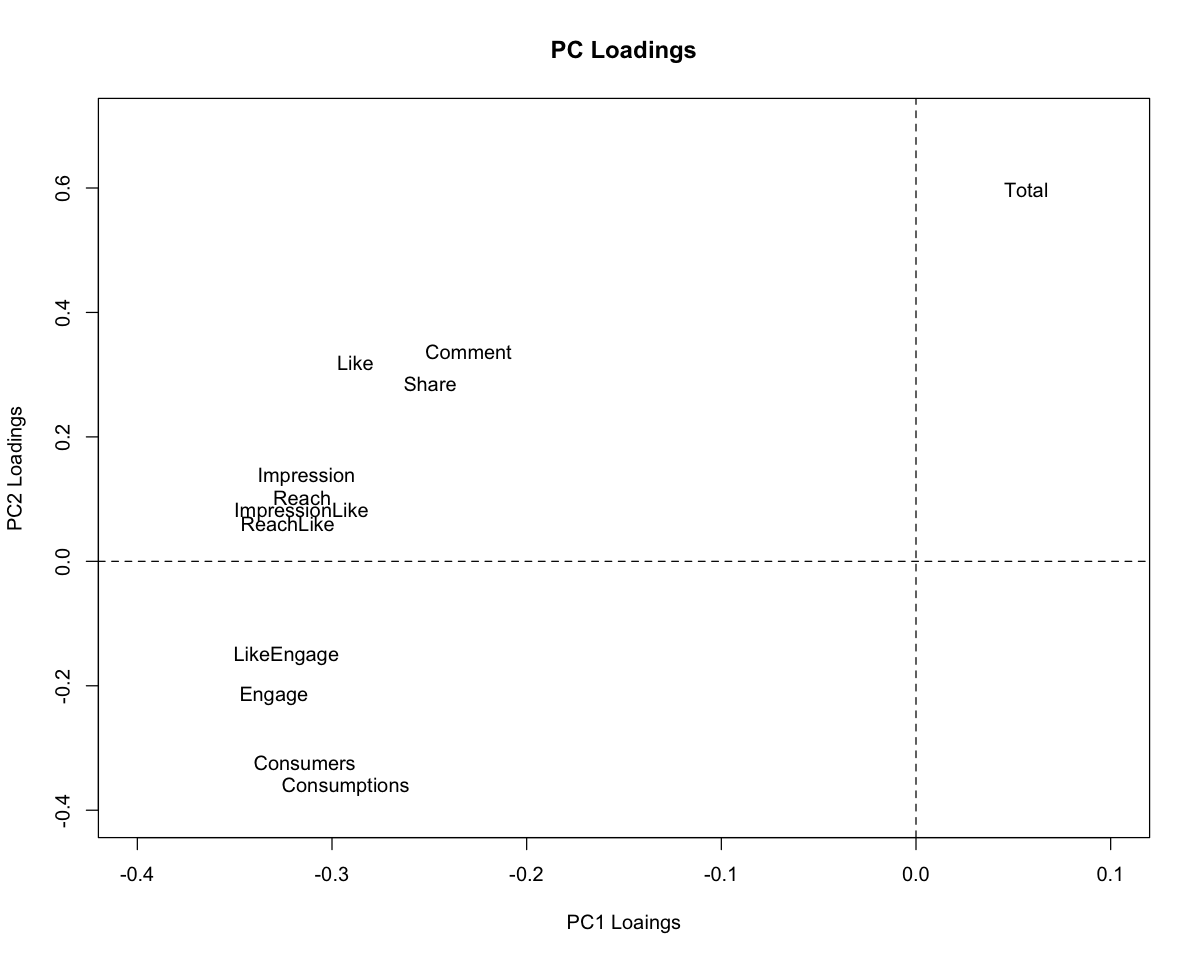

In [34]:
plot(pcaCOR$loadings[,1:2], xlab="PC1 Loaings", ylab="PC2 Loadings", type="n", main="PC Loadings", xlim=c(-0.4, 0.1), ylim=c(-0.4, 0.7))
text(pcaCOR$loadings[,1:2], labels=colnames(dataset4[,c(1,8:18)]))
abline(v=0, h=0,lty=2)

PC1 has large loadings for predictors *Impression*, *Reach*, *ImpressionLike*, *ReachLike*, *LikeEngage*, *Engage*, *Consumers*. It is related to posts.

PC2 has large loadings for predictors *Total*, which indicates the popularity of company's page. 

## Part4. Feature Selection

From the description of predictors and the visualization of PCA, some predictors are highly correlated. In this part, we will conduct various parametric and non-parametric hypothesis testings to select appropriate predictors for prediction.  

In addition, we are interested in the relationships between predictors. Specifically, we will delve into the association between {Comment, Like, Share} and the other predictors.

### 1. Comment, Like, and Share

From description of variables, we know the number of *Interaction* is the summation of the number of *Comment*, *Like*, and *Share*. Also, the scatterplots in previous part have shown a strong positive linear relationship between *Interaction* and *Comment*, *Like*, and *Share* respectively. Therefore, we must delete them when making prediction. 

### 2. Weekday

In [35]:
weekday0 = dataset4 %>% filter(Weekday=="0") %>% select(Interaction)
weekday1 = dataset4 %>% filter(Weekday=="1") %>% select(Interaction)

[1]  4 33

[1] 56 72

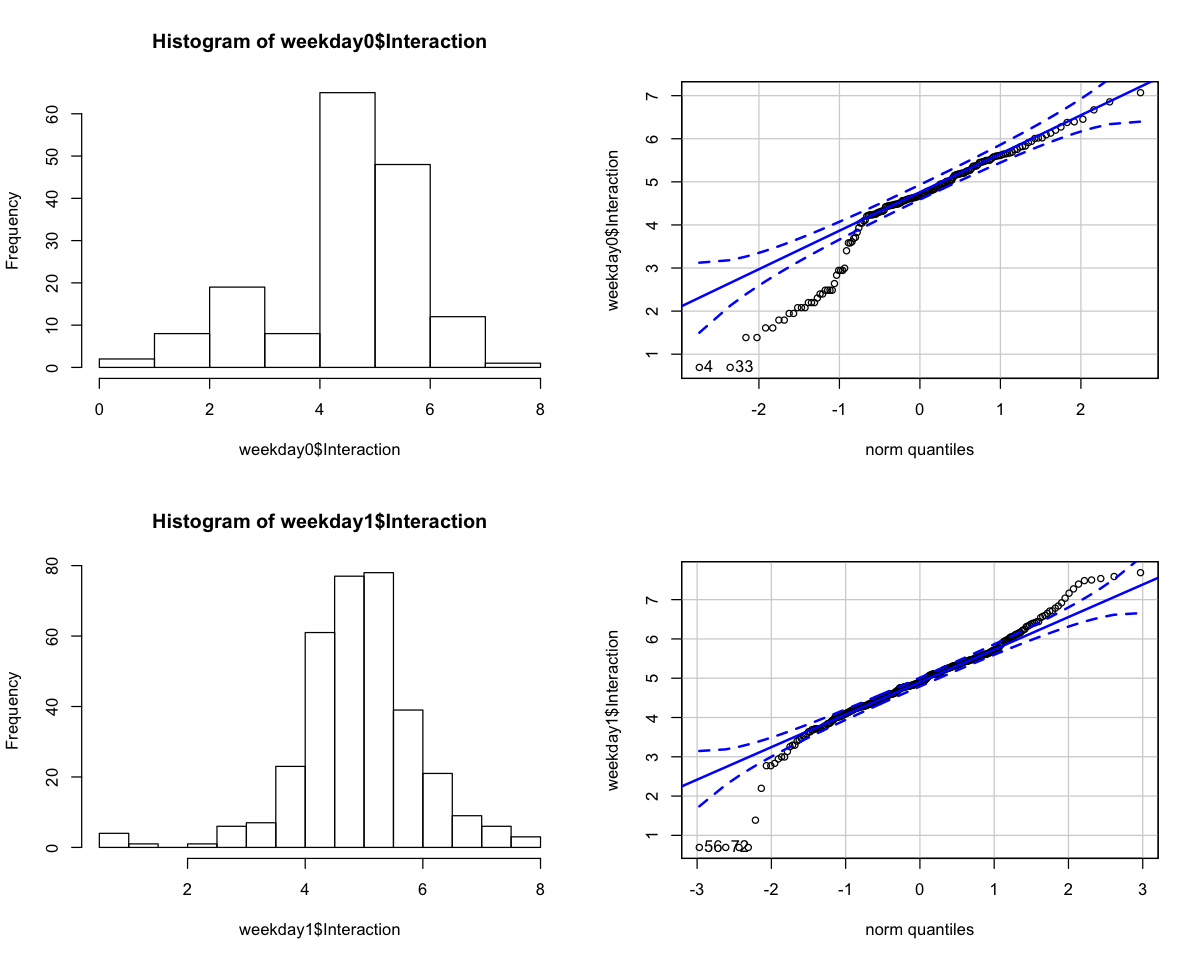

In [36]:
par(mfrow=c(2,2))
hist(weekday0$Interaction)
qqPlot(weekday0$Interaction)
hist(weekday1$Interaction)
qqPlot(weekday1$Interaction)

From histogram, the distribution of *Interaction* conditioned on *Weekday* is left-skewed even if we have applied log-transformation on the original data. 

Also, in the QQ plot, the data points do not on the diagonal line, which indicates the distribution is not normal.

In [37]:
shapiro.test(weekday0$Interaction)
shapiro.test(weekday1$Interaction)


	Shapiro-Wilk normality test

data:  weekday0$Interaction
W = 0.92613, p-value = 2.088e-07



	Shapiro-Wilk normality test

data:  weekday1$Interaction
W = 0.94993, p-value = 2.869e-09


Using Shapiro-Wilk’s test to test normality, since p-values of both datasets are smaller than 0.05 significance level, we reject $H_0$ and have strong evidence to conclude that the distributions of datasets are significantly different form normal distribution.
  
Since normality assumption is violated, it is unreasonable to use two-sample t-test. Instead, we will apply exact Wilcoxon's rank sum test, which is the non-parametric version of two-sample t-test.

In [38]:
library(exactRankTests)

In [39]:
wilcox.exact(x=weekday0$Interaction, y=weekday1$Interaction, alternative = "two.sided", conf.int = T)


	Asymptotic Wilcoxon rank sum test

data:  weekday0$Interaction and weekday1$Interaction
W = 23351, p-value = 0.00759
alternative hypothesis: true mu is not equal to 0
95 percent confidence interval:
 -0.44629793 -0.06696638
sample estimates:
difference in location 
            -0.2507506 


P-value = 0.00759 < 0.05 significance level, we reject $H_0$ and have strong evidence to conclude that there is a difference for *Interaction* on weekdays and on weekends. 

### 3. Type

In [40]:
tmp = aov(Interaction~Type, data=dataset4)
res = residuals(tmp)

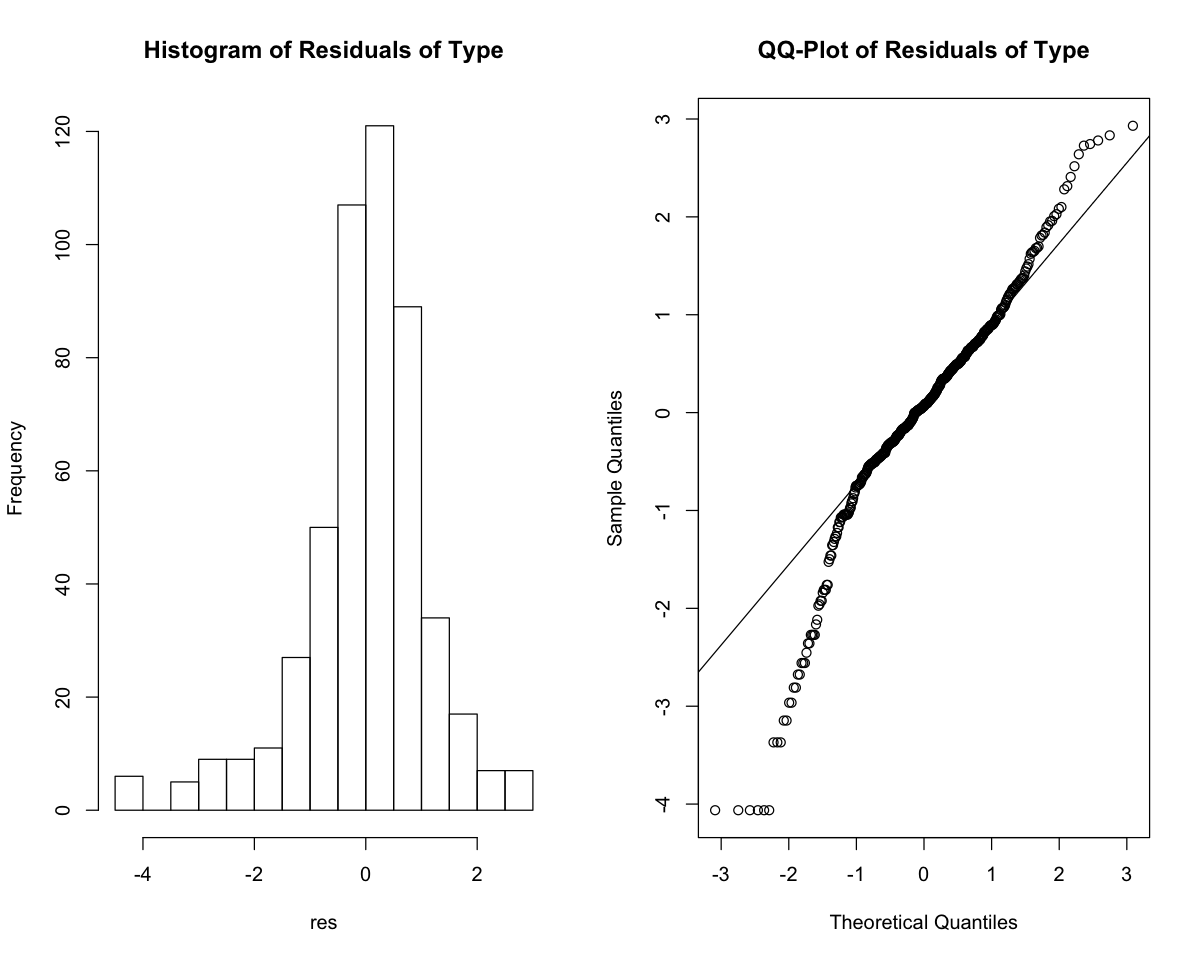

In [41]:
par(mfrow=c(1,2))
hist(res, main = "Histogram of Residuals of Type")
qqnorm(res, main = "QQ-Plot of Residuals of Type")
qqline(res)

From histogram of the residuals of *Type*, it is a little left-skewed. Also, the QQ-plot shows the data points do not on the diagonal line. So the normality assumption is violated.  

In [42]:
with(dataset4, tapply(Interaction, Type, sd))

Link     Photo    Status     Video 
1.0428347 1.1594010 0.7978248 0.7319121

The variance of level Photo is almost two times the variance of level Video, which indicates the constant variance assumption is unsatisfied.
   
Since assumptions of one-way ANOVA do not satisfied, we decide to use Kruskal-Wallis ANOVA, which is the nonparametric version of one-way ANOVA.

In [43]:
kruskal.test(Interaction~Type, data=dataset4)


	Kruskal-Wallis rank sum test

data:  Interaction by Type
Kruskal-Wallis chi-squared = 20.318, df = 3, p-value = 0.0001458


P-value = 0.0001458 < 0.05 significance level, we can reject $H_0$ and conclude that at least one levels is different from the others.
     
In order to find which one is significantly different, we conduct Dunn's Kruskal-Wallis multiple comparisons.

In [44]:
dunnTest(Interaction~Type, data=dataset4, method="bonferroni")

Dunn (1964) Kruskal-Wallis multiple comparison

  p-values adjusted with the Bonferroni method.




      Comparison          Z      P.unadj        P.adj
1   Link - Photo -3.2123196 1.316678e-03 0.0079000686
2  Link - Status -4.0790747 4.521532e-05 0.0002712919
3 Photo - Status -2.2887186 2.209571e-02 0.1325742613
4   Link - Video -3.3029173 9.568460e-04 0.0057410759
5  Photo - Video -1.9181174 5.509613e-02 0.3305767593
6 Status - Video -0.9159154 3.597113e-01 1.0000000000

From the output of multiple comparisons, we find {Link} is significantly different from {Photo, Status, Video}. There is no difference between {Photo, Link, Status}.
     
So, we group levels Photo, Link, and Status together as a new level.

In [45]:
tmp = ifelse(dataset4$Type=="Link", "Link", "Other")
dataset4$Type = as.factor(tmp)

### 4. Category

In [46]:
tmp = aov(Interaction~Category, data=dataset4)
res = residuals(tmp)

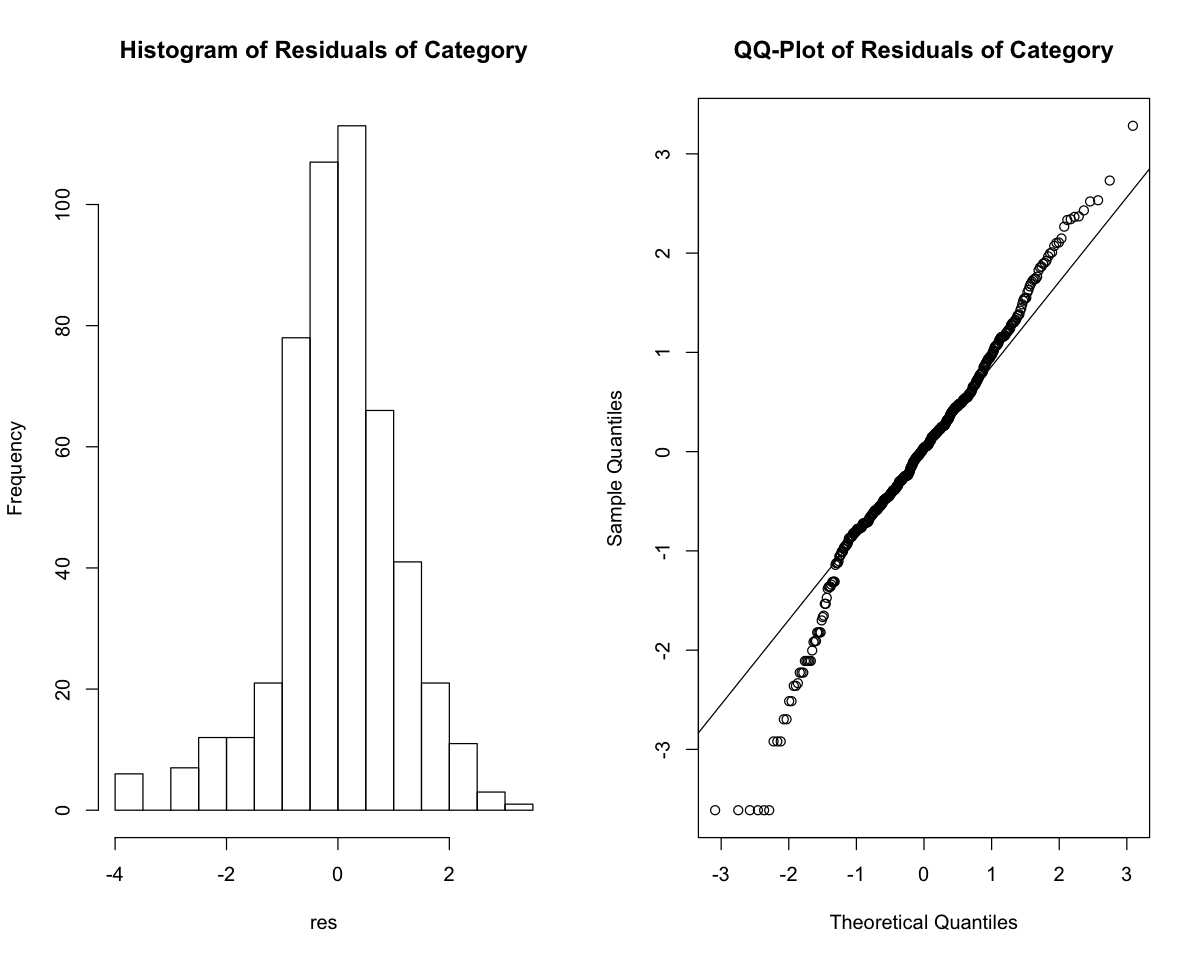

In [47]:
par(mfrow=c(1,2))
hist(res, main = "Histogram of Residuals of Category")
qqnorm(res, main = "QQ-Plot of Residuals of Category")
qqline(res)

From histogram of the residuals of *Category*, it is a little left-skewed. Also, the QQ-plot shows the data points do not on the diagonal line. So the normality assumption is violated.

In [48]:
with(dataset4, tapply(Interaction, Category, sd))

1         2         3 
1.3474189 0.7688374 0.8037587

The variance of levels {2, 3} is much smaller than the variance of level {1}, which indicates the constant variance assumption is unsatisfied.

Since assumptions of One-way ANOVA do not satisfied, we decide to use Kruskal-Wallis ANOVA, which is the nonparametric version of one-way ANOVA.

In [49]:
kruskal.test(Interaction~Category, data=dataset4)


	Kruskal-Wallis rank sum test

data:  Interaction by Category
Kruskal-Wallis chi-squared = 48.807, df = 2, p-value = 2.522e-11


P-value = 2.522e-11 < 0.05 significance level, we can reject $H_0$ and conclude that at least one levels is different from the others.   

In order to find which one is significantly different, we conduct Dunn's Kruskal-Wallis multiple comparisons.

In [50]:
dunnTest(Interaction~Category, data=dataset4, method="bonferroni")

Dunn (1964) Kruskal-Wallis multiple comparison

  p-values adjusted with the Bonferroni method.




  Comparison          Z      P.unadj        P.adj
1      1 - 2 -5.0741458 3.892405e-07 1.167722e-06
2      1 - 3 -6.4199147 1.363507e-10 4.090521e-10
3      2 - 3 -0.9344035 3.500958e-01 1.000000e+00

From the output of multiple comparisons, we find {1} is significantly different from {2, 3}. There is no difference between {2, 3}.
    
So, we group levels 2 and 3 together as a new level to reduce the number of levels in *Category*.

In [51]:
tmp = ifelse(dataset4$Category=="1", "1", "0")
dataset4$Category = as.factor(tmp)

### 5. Month

In [52]:
tmp = aov(Interaction~Month, data=dataset4)
res = residuals(tmp)

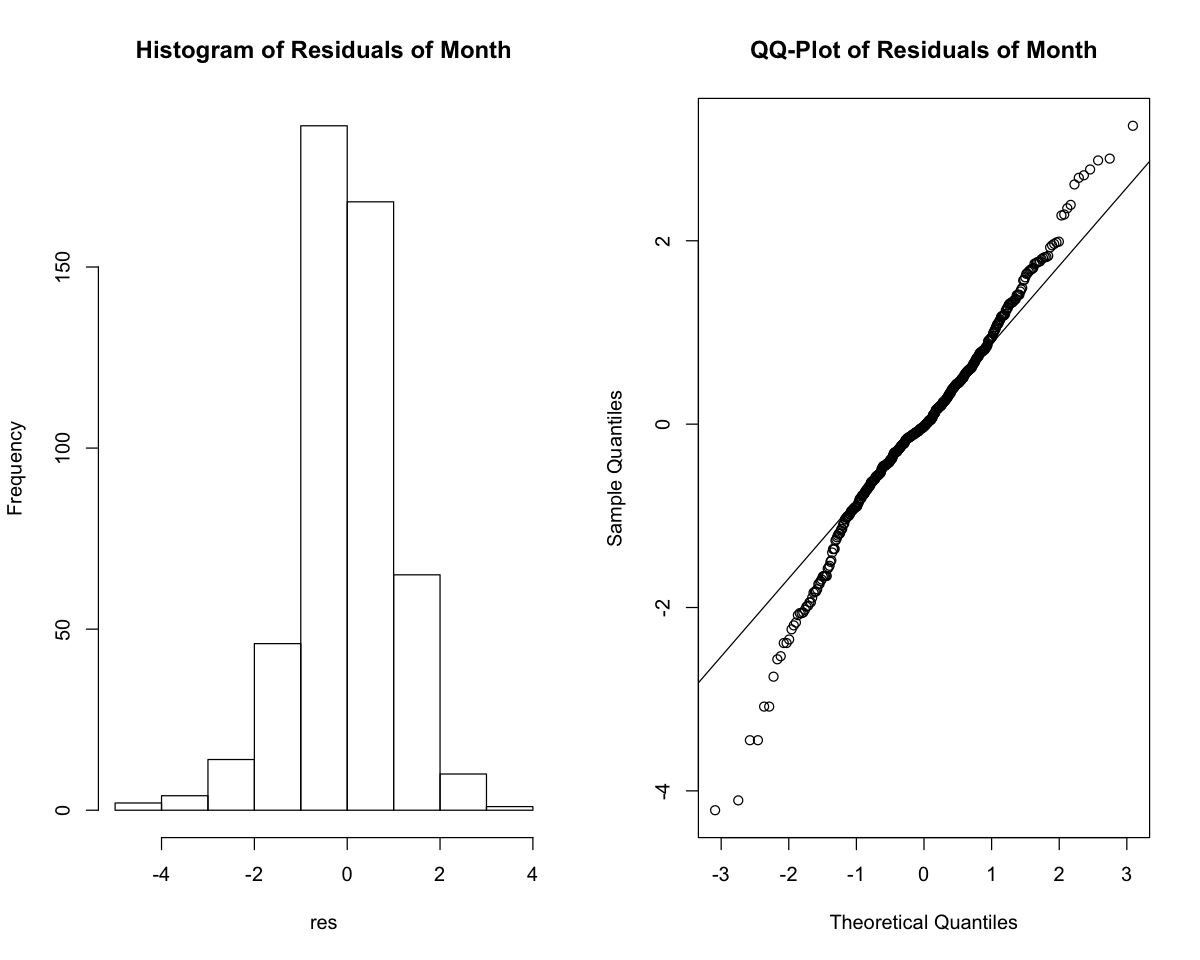

In [53]:
par(mfrow=c(1,2))
hist(res, main = "Histogram of Residuals of Month")
qqnorm(res, main = "QQ-Plot of Residuals of Month")
qqline(res)

The histogram of residual suggests that normality assumption is reasonable. However, in QQ-plot, the data points do not exactly on the diagonal. It is hard to determine form the plots.   

In [54]:
shapiro.test(res)


	Shapiro-Wilk normality test

data:  res
W = 0.98085, p-value = 3.855e-06


Using Shapiro-Wilk’s test to test normality, since p-values = 3.855e-06 < 0.05 significance level, we reject $H_0$ and have strong evidence to conclude that the distribution of residuals is significantly different form normal distribution.   

In [55]:
with(dataset4, tapply(Interaction, Month, sd))

1         2         3         4         5         6         7         8 
0.8946032 0.7526131 1.5060058 0.8070527 0.7392117 0.8730537 0.8344995 1.0190975 
        9        10        11        12 
0.8653290 1.6750032 0.9518086 1.0838509

Also, the variance of each Month is not constant.

Since assumptions of One-way ANOVA do not satisfied, we decide to use Kruskal-Wallis ANOVA, which is the nonparametric version of one-way ANOVA.

In [56]:
kruskal.test(Interaction~Month, data=dataset4)


	Kruskal-Wallis rank sum test

data:  Interaction by Month
Kruskal-Wallis chi-squared = 45.8, df = 11, p-value = 3.508e-06


P-value = 3.508e-06 < 0.05 significance level, we can reject $H_0$ and conclude that at least one levels is different from the others.

In order to find which one is significantly different, we conduct Dunn's Kruskal-Wallis multiple comparisons.

In [57]:
dunnTest(Interaction~Month, data=dataset4, method="bonferroni")

Dunn (1964) Kruskal-Wallis multiple comparison

  p-values adjusted with the Bonferroni method.




   Comparison           Z      P.unadj        P.adj
1      1 - 10  1.12874153 2.590069e-01 1.0000000000
2      1 - 11 -0.66868833 5.036943e-01 1.0000000000
3     10 - 11 -2.20835969 2.721921e-02 1.0000000000
4      1 - 12 -0.16223343 8.711220e-01 1.0000000000
5     10 - 12 -1.61073955 1.072365e-01 1.0000000000
6     11 - 12  0.61836176 5.363369e-01 1.0000000000
7       1 - 2 -1.48567279 1.373657e-01 1.0000000000
8      10 - 2 -2.91679493 3.536482e-03 0.2334078152
9      11 - 2 -1.01222167 3.114321e-01 1.0000000000
10     12 - 2 -1.55678682 1.195211e-01 1.0000000000
11      1 - 3  2.53659387 1.119367e-02 0.7387824084
12     10 - 3  1.85793372 6.317843e-02 1.0000000000
13     11 - 3  3.69926689 2.162231e-04 0.0142707269
14     12 - 3  3.20301879 1.359951e-03 0.0897567700
15      2 - 3  4.18282109 2.879140e-05 0.0019002321
16      1 - 4 -0.53001917 5.960986e-01 1.0000000000
17     10 - 4 -2.08121265 3.741445e-02 1.0000000000
18     11 - 4  0.17993206 8.572059e-01 1.0000000000
19     12 - 

From multiple comparisons, we find {3} is significantly different from {2, 4, 5, 7, 9, 11}. {10} is significantly different from {5, 9}.

Also, from previous boxplot, it shows that the meadian value of *Interaction* in March and October is lower than the other months and the variance of *Interaction* in these two months is larger than the others.

So, we decide to re-discretize Month into 2 levels.    

In [58]:
tmp = ifelse(dataset4$Month %in% c("3","10"), "1", "0")
dataset4$Month = as.factor(tmp)

### 6. Hour

In [59]:
tmp = aov(Interaction~Hour, data=dataset4)
res = residuals(tmp)

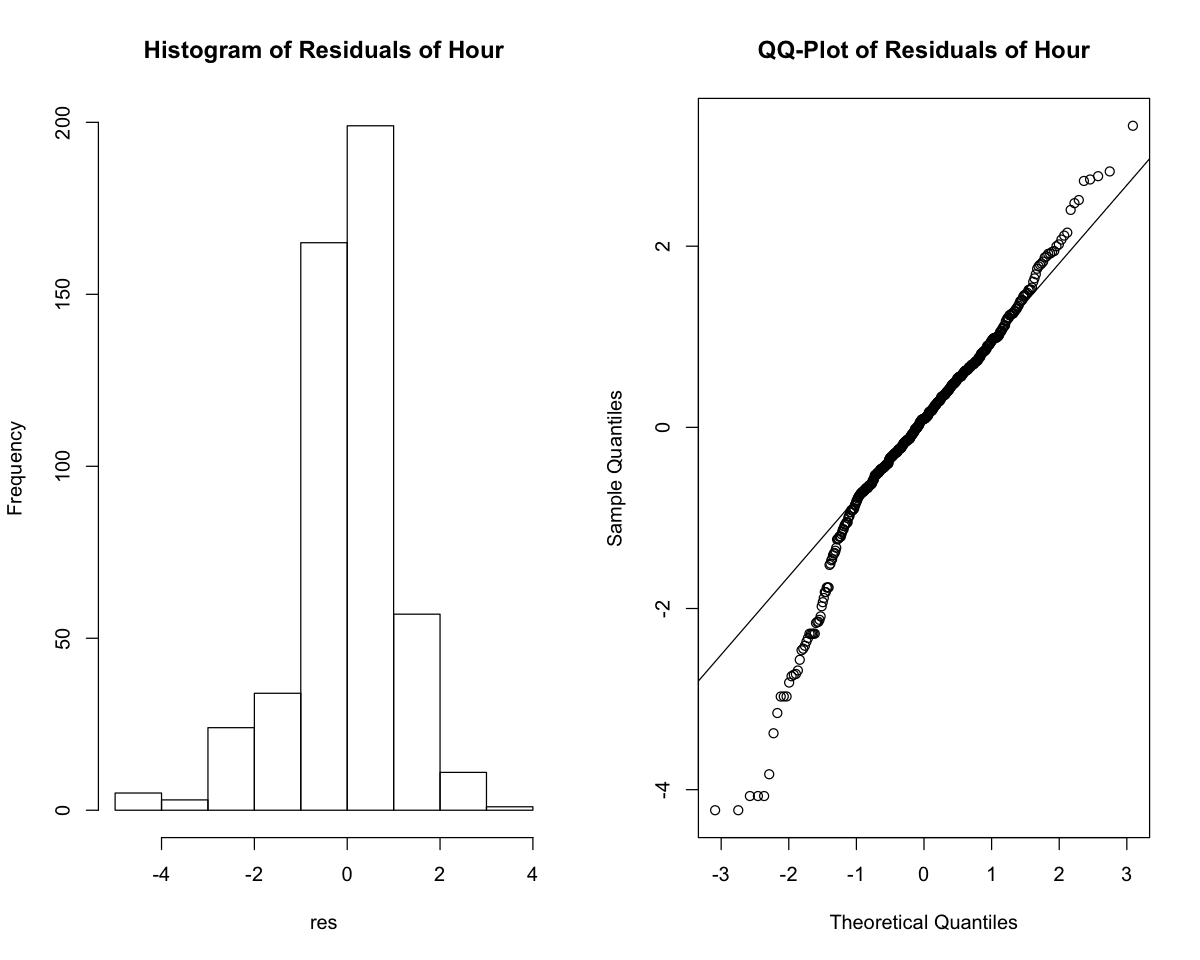

In [60]:
par(mfrow=c(1,2))
hist(res, main = "Histogram of Residuals of Hour")
qqnorm(res, main = "QQ-Plot of Residuals of Hour")
qqline(res)

The histogram shows the distribution of residual is almost symmetric while the QQ-plot indicates data points do not follow normal distribution.

In [61]:
shapiro.test(res)


	Shapiro-Wilk normality test

data:  res
W = 0.95395, p-value = 2.318e-11


Using Shapiro-Wilk normality test, p-value = 2.318e-11 < 0.05 significance level, we reject $H_0$ and conclude that the residuals of *Hour* is not normally distributed.

In [62]:
with(dataset4, tapply(Interaction, Hour, sd))

0         1         2         3 
0.9800756 1.2006682 1.1634536 1.4733814

The variance of each level seems constant.

Since normality assumption of One-way ANOVA is violated, we perform Kruskal-Wallis ANOVA instead. 

In [63]:
kruskal.test(Interaction~Hour, data=dataset4)


	Kruskal-Wallis rank sum test

data:  Interaction by Hour
Kruskal-Wallis chi-squared = 5.7453, df = 3, p-value = 0.1247


P-value = 0.1247 > 0.05 significance level, we fail to reject $H_0$ and conclude that there is no difference between each level.   

### 7. Paid

In [64]:
tmp = aov(Interaction~Paid, data=dataset4)
res = residuals(tmp)

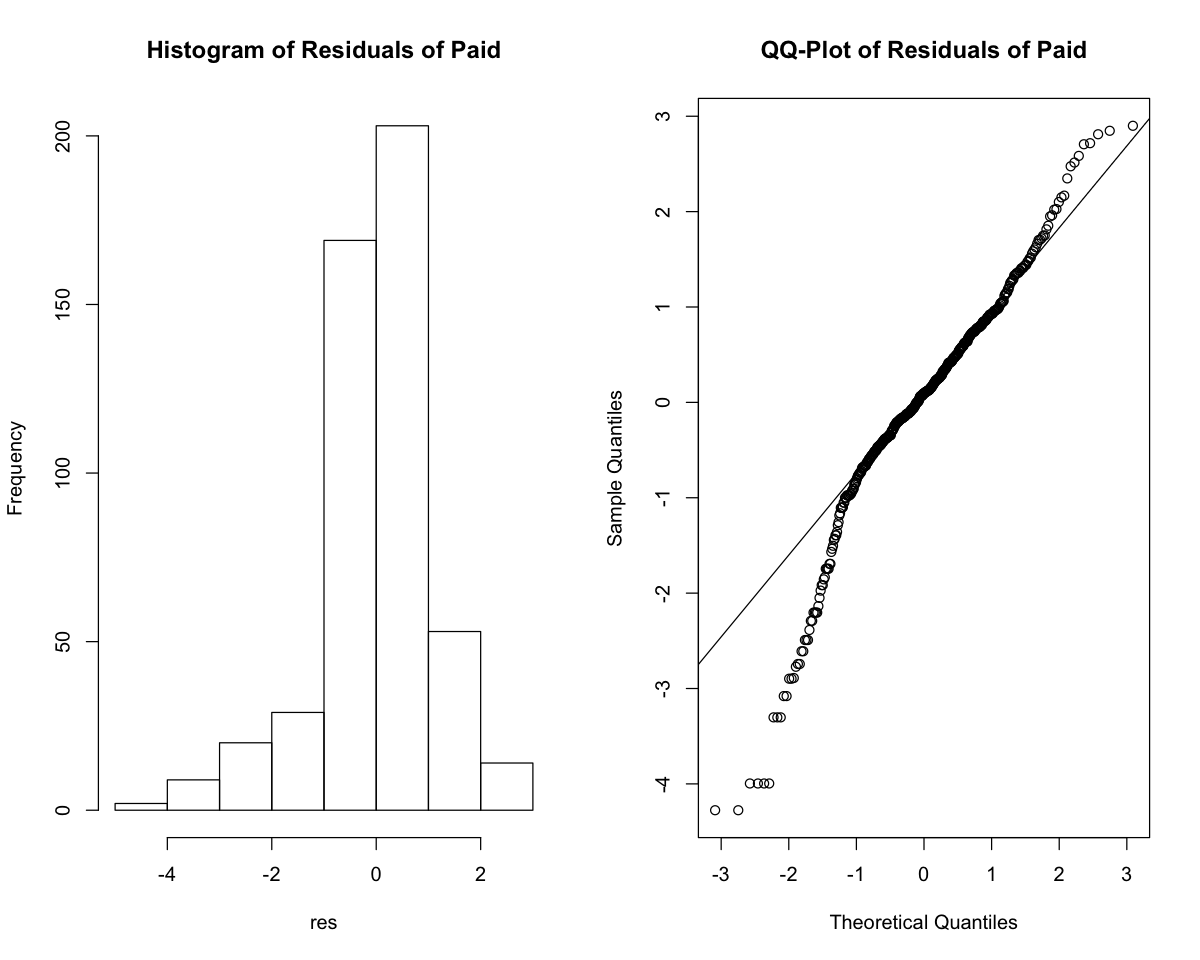

In [65]:
par(mfrow=c(1,2))
hist(res, main = "Histogram of Residuals of Paid")
qqnorm(res, main = "QQ-Plot of Residuals of Paid")
qqline(res)

In [66]:
shapiro.test(res)


	Shapiro-Wilk normality test

data:  res
W = 0.94638, p-value = 1.851e-12


Using histogram, QQ-plot, and Shapiro-Wilk normality test, we conclude that the residuals of *Paid* does not follow normal distribution. Therefore, One-way ANOVA cannot be used. Instead, we will perform Kruskal-Wallis ANOVA.  

In [67]:
kruskal.test(Interaction~Paid, data=dataset4)


	Kruskal-Wallis rank sum test

data:  Interaction by Paid
Kruskal-Wallis chi-squared = 6.1607, df = 1, p-value = 0.01306


P-value = 0.01306 < 0.05 significance level, we reject $H_0$ and conclude that there is a difference between level 0 and level 1.    

### 8. Reach and Impression

From the description of variables, we know predictors *Reach* and *Impression* are very similar. In order to avoid collinearity and to keep the stability of variance for each predictor, we will only choose one of them for the prediction.  

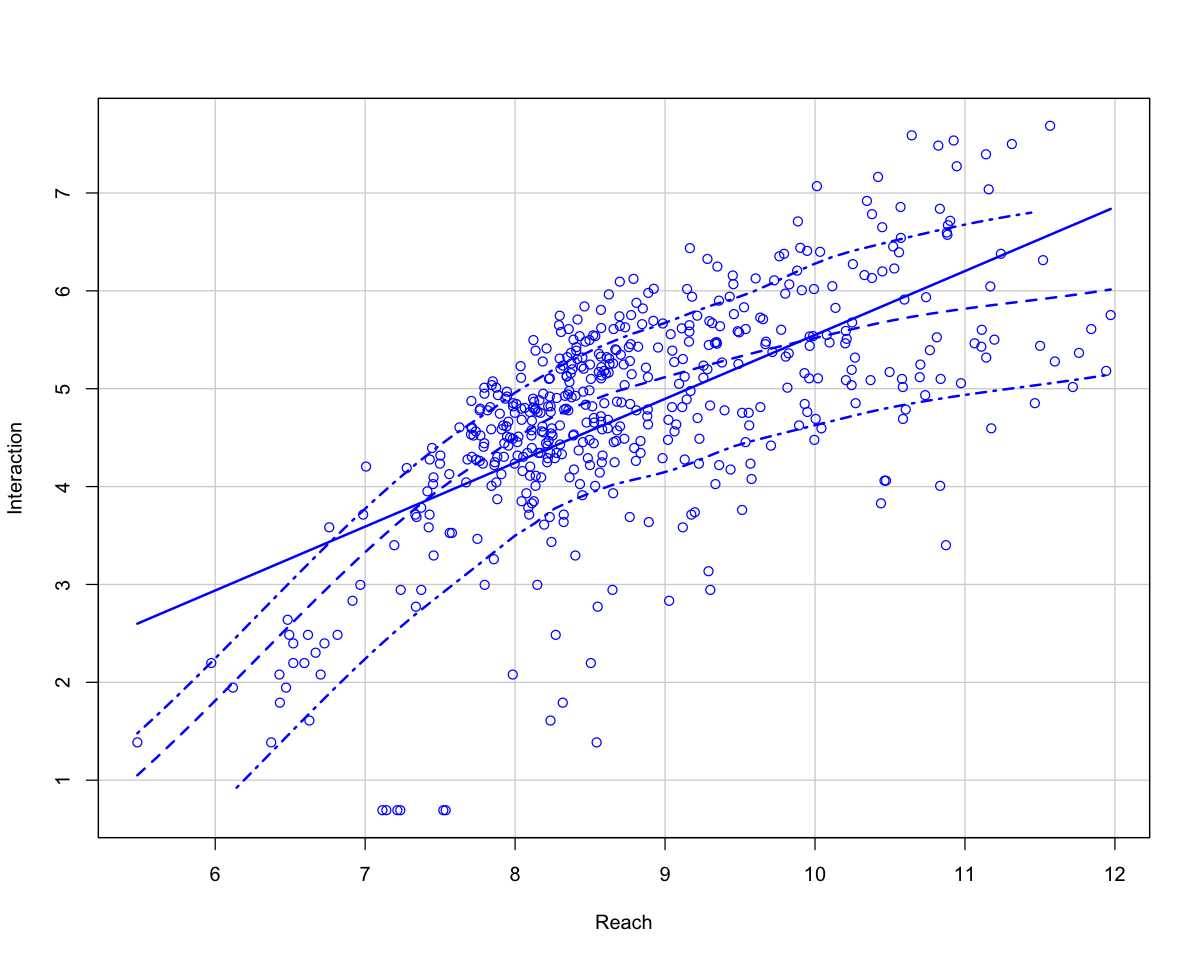

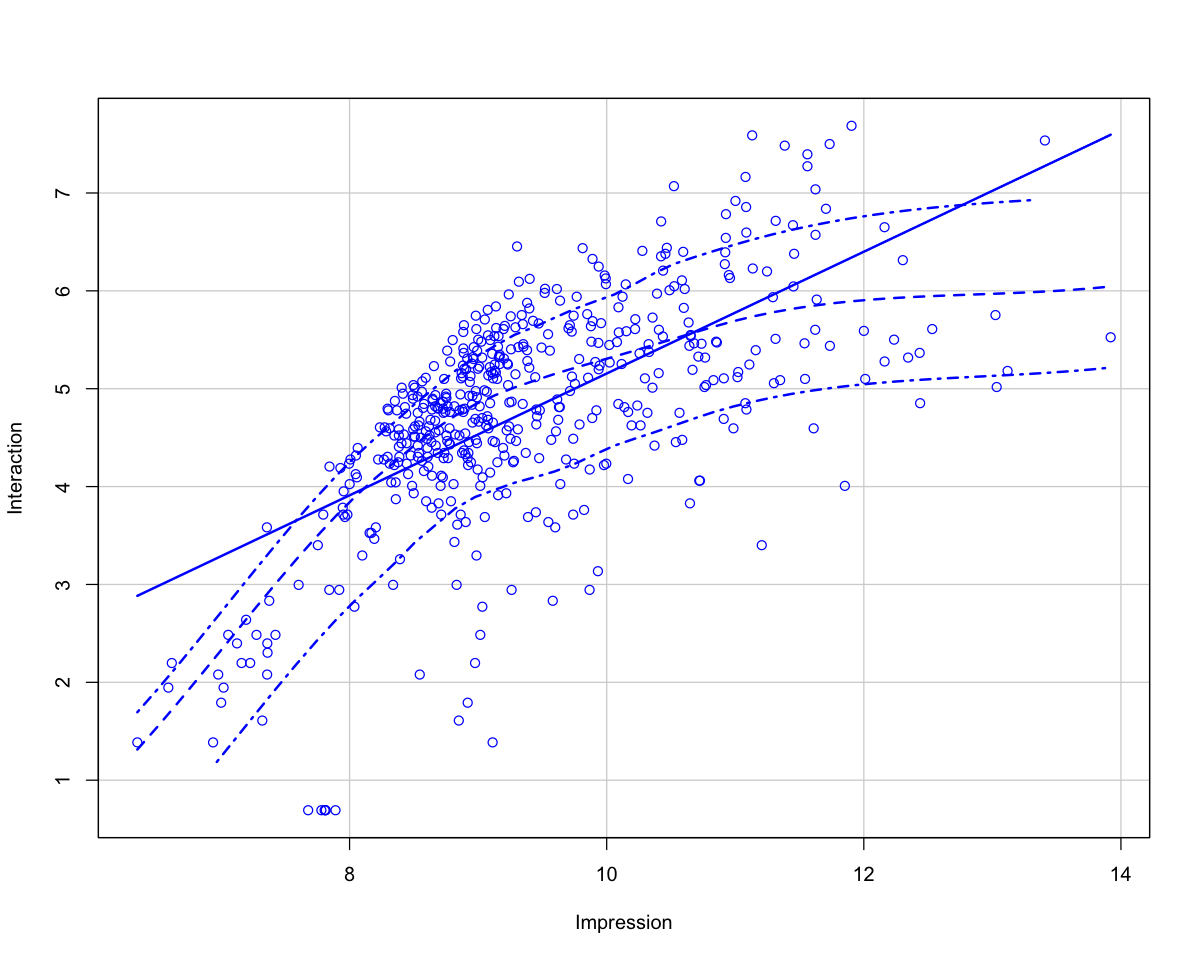

In [68]:
scatterplot(Interaction~Reach, data=dataset4, boxplot=F)
scatterplot(Interaction~Impression, data=dataset4, boxplot=F)

From scatterplots, since there is a discrepancy between LOESS estimate and OLS estimate, the relationships between *Interaction* and either *Reach* or *Impression* are not linear, which indicates Pearson's product-moment correlation is not reliable and we will use Kendall's rank correlation. 

In [69]:
with(dataset4, cor.test(Reach, Interaction, method="kendall"))
with(dataset4, cor.test(Impression, Interaction, method="kendall"))


	Kendall's rank correlation tau

data:  Reach and Interaction
z = 15.76, p-value < 2.2e-16
alternative hypothesis: true tau is not equal to 0
sample estimates:
      tau 
0.4726915 



	Kendall's rank correlation tau

data:  Impression and Interaction
z = 15.999, p-value < 2.2e-16
alternative hypothesis: true tau is not equal to 0
sample estimates:
      tau 
0.4798399 


Since both p-value < 0.05 significance level, the correlations between *Interaction* and either *Reach* or *Impression* are statistically significant.

Correlation between *Interaction* and *Impression* is slightly higher, so we prefer use it for prediction.   

### 9. Engage, Consumers, and Consumptions

From the description of variables, we know predictors *Engage*, *Consumers* and *Consumptions* are very similar. In order to avoid collinearity and to keep the stability of variance for each predictor, we will only choose one of them for the prediction.  

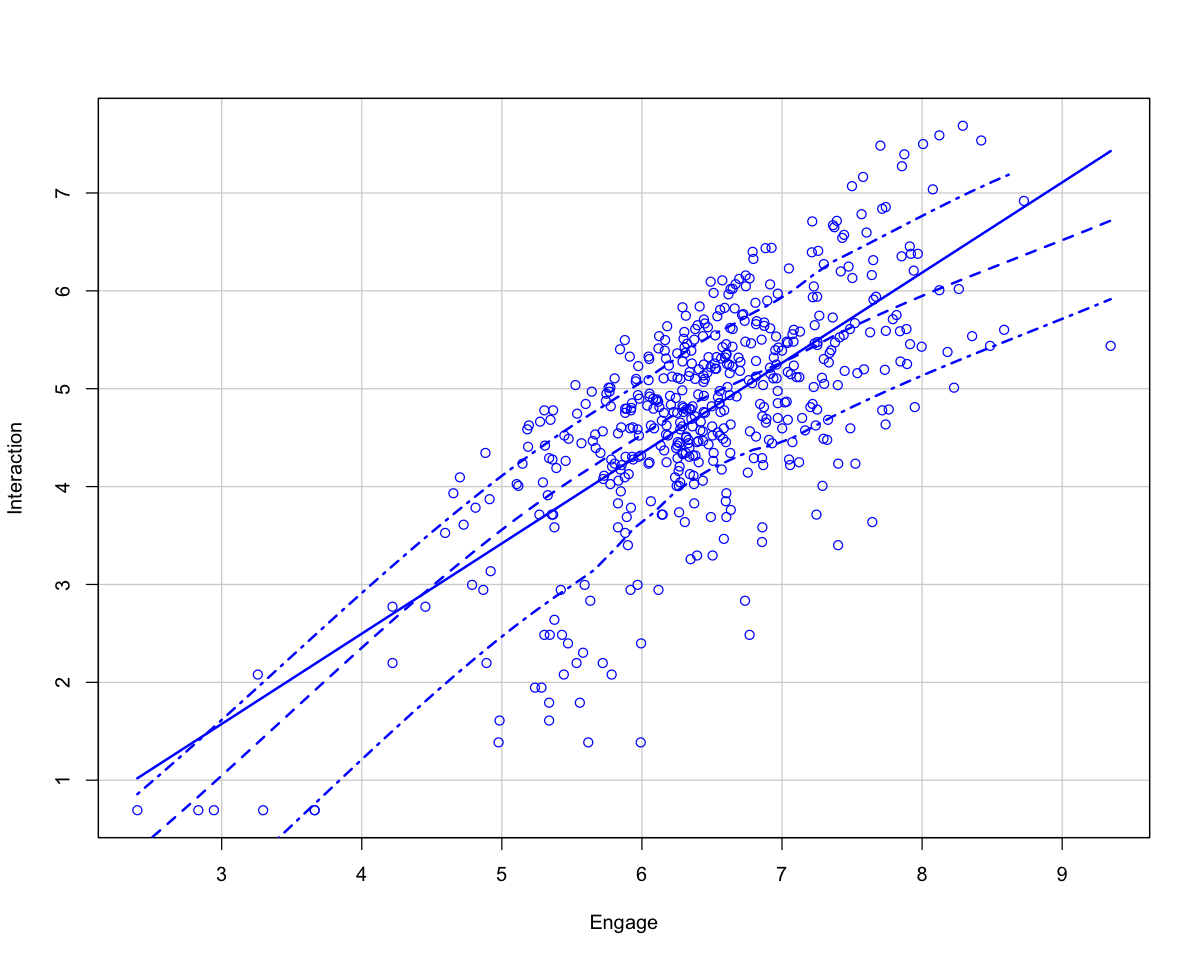

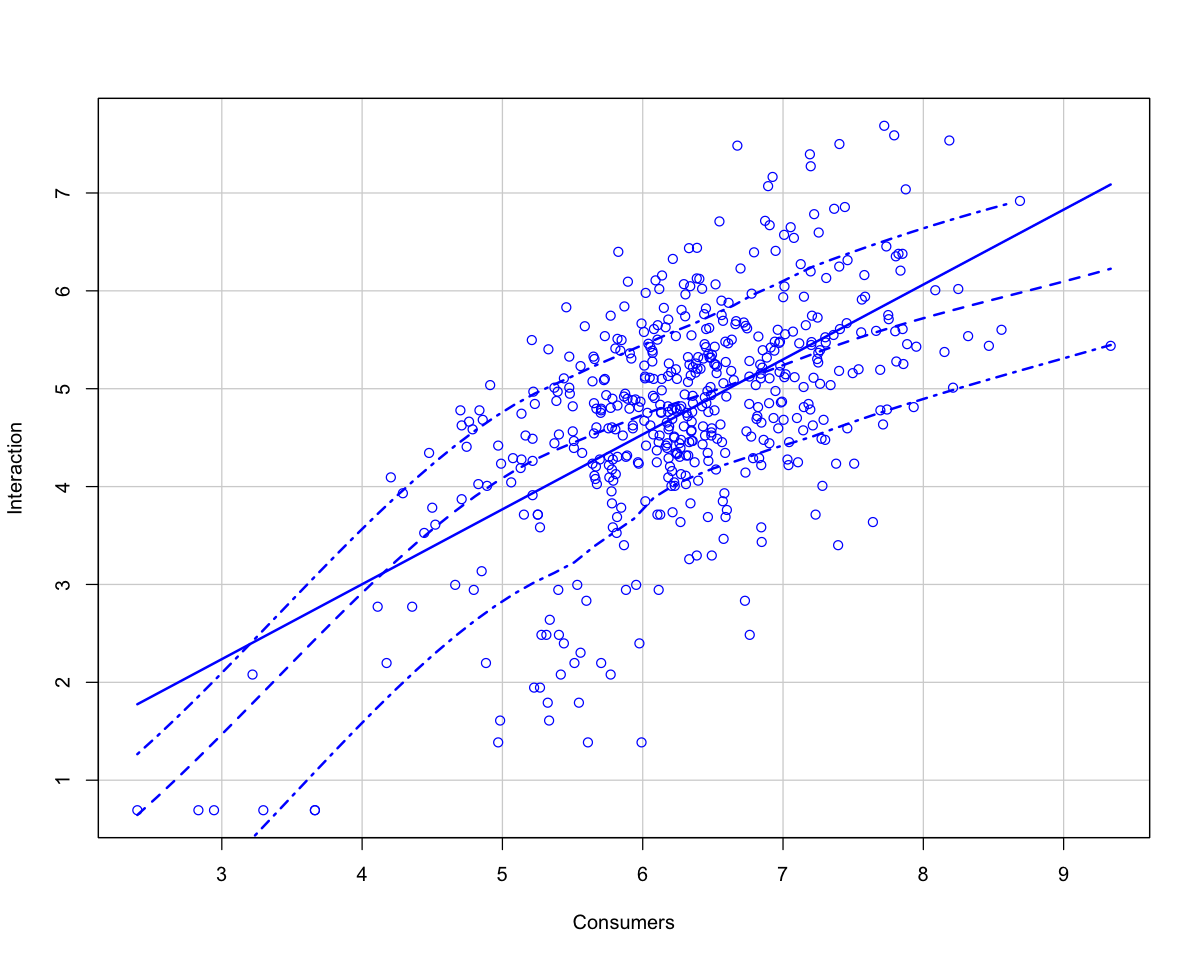

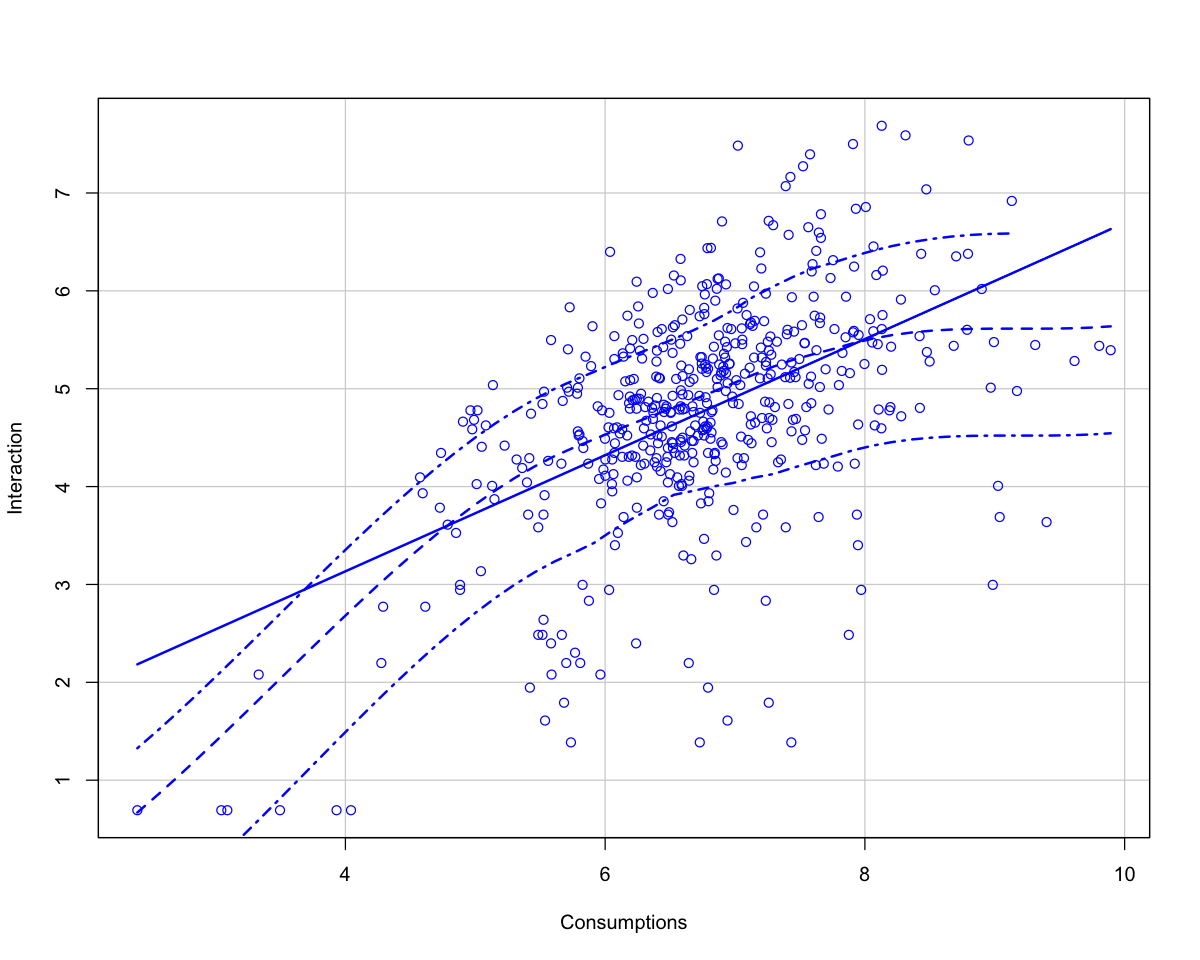

In [70]:
scatterplot(Interaction~Engage, data=dataset4, boxplot=F)
scatterplot(Interaction~Consumers, data=dataset4, boxplot=F)
scatterplot(Interaction~Consumptions, data=dataset4, boxplot=F)

From scatterplots, since there is a large discrepancy between LOESS estimate and OLS estimate, the relationships between *Interaction* and either *Engage*, *Consumers*, or *Consumptions* are not linear, which indicates Pearson's product-moment correlation is not reliable and we will use Kendall's rank correlation.    

In [71]:
with(dataset4, cor.test(Engage, Interaction, method="kendall"))
with(dataset4, cor.test(Consumers, Interaction, method="kendall"))
with(dataset4, cor.test(Consumptions, Interaction, method="kendall"))


	Kendall's rank correlation tau

data:  Engage and Interaction
z = 15.461, p-value < 2.2e-16
alternative hypothesis: true tau is not equal to 0
sample estimates:
      tau 
0.4639007 



	Kendall's rank correlation tau

data:  Consumers and Interaction
z = 12.059, p-value < 2.2e-16
alternative hypothesis: true tau is not equal to 0
sample estimates:
      tau 
0.3617968 



	Kendall's rank correlation tau

data:  Consumptions and Interaction
z = 11.168, p-value < 2.2e-16
alternative hypothesis: true tau is not equal to 0
sample estimates:
      tau 
0.3350495 


Since all the p-value < 0.05 significance level, the correlations between *Interaction* and either *Engage*, *Consumers*, or *Consumptions* are statistically significant.
      
Correlation between *Interaction* and *Engage* is the highest, so we prefer use it for prediction.

### 10. ReachLike and LikeEngage

From the description of variables, we know predictors *ReachLike* and *LikeEngage* are very similar. In order to avoid collinearity and to keep the stability of variance for each predictor, we will only choose one of them for the prediction.

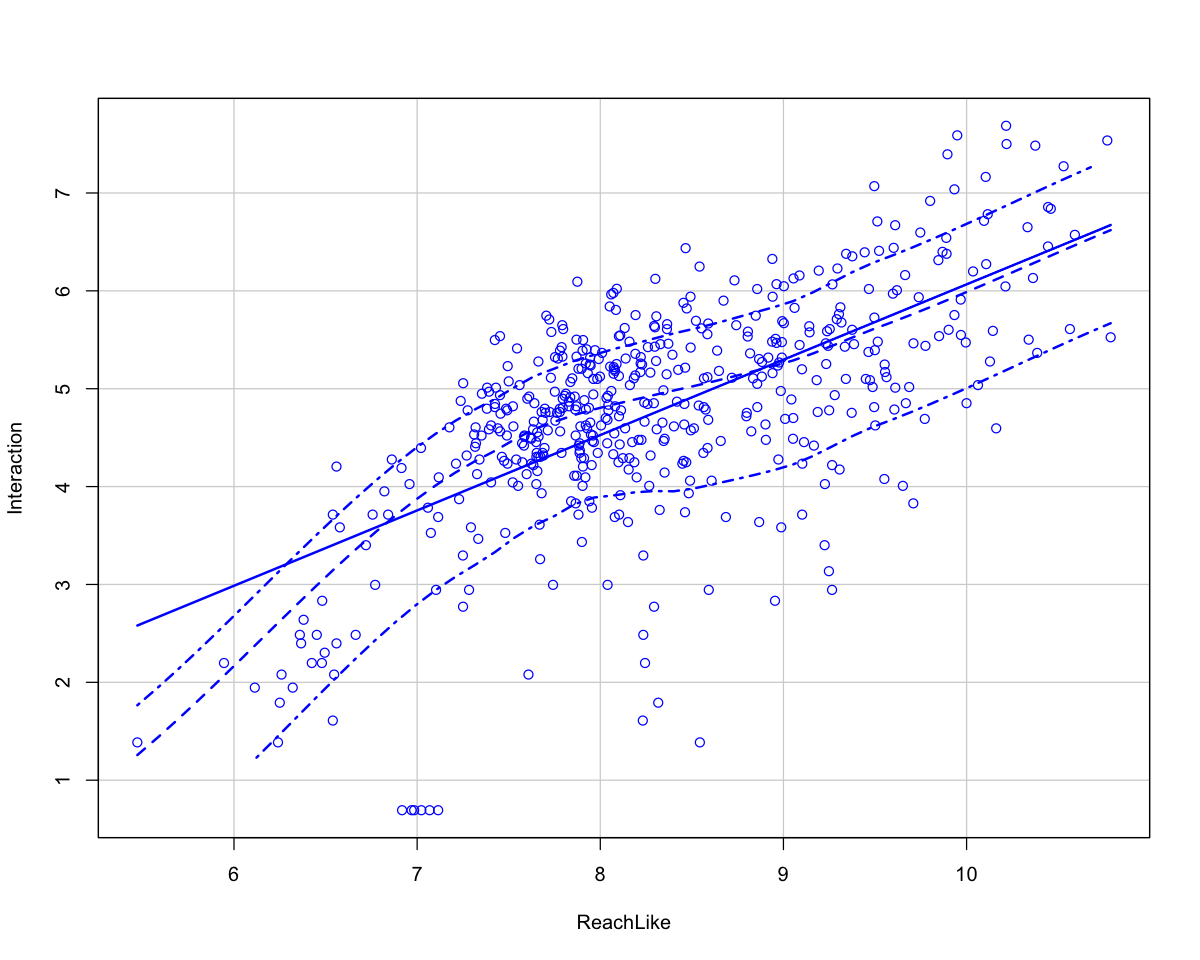

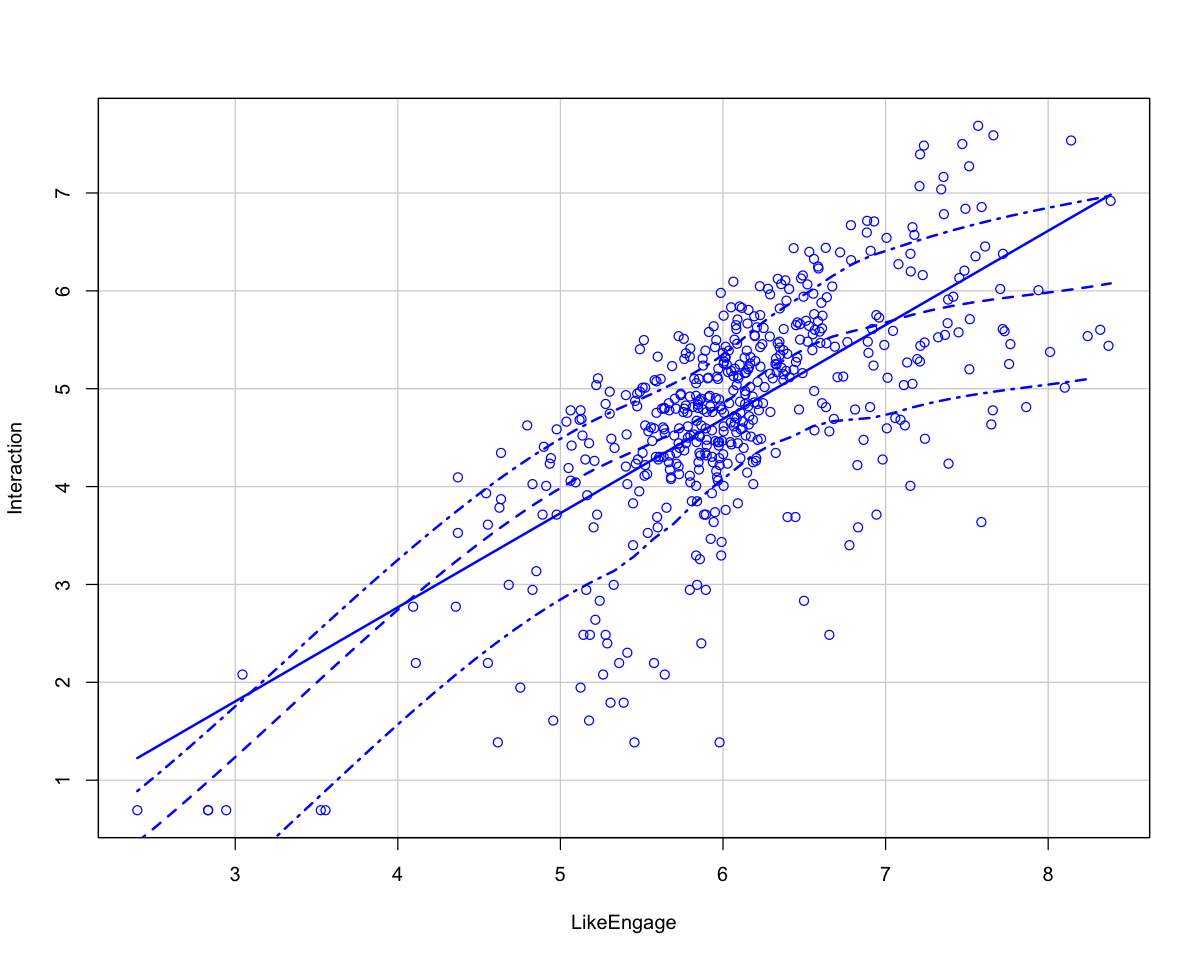

In [72]:
scatterplot(Interaction~ReachLike, data=dataset4, boxplot=F)
scatterplot(Interaction~LikeEngage, data=dataset4, boxplot=F)

From scatterplots, since there is a large discrepancy between LOESS estimate and OLS estimate, the relationships between *Interaction* and either *ReachLike* or *LikeEngage* are not linear, which indicates Pearson's product-moment correlation is not reliable and we will use Kendall's rank correlation.      

In [73]:
with(dataset4, cor.test(ReachLike, Interaction, method="kendall"))
with(dataset4, cor.test(LikeEngage, Interaction, method="kendall"))


	Kendall's rank correlation tau

data:  ReachLike and Interaction
z = 14.286, p-value < 2.2e-16
alternative hypothesis: true tau is not equal to 0
sample estimates:
      tau 
0.4285154 



	Kendall's rank correlation tau

data:  LikeEngage and Interaction
z = 16.32, p-value < 2.2e-16
alternative hypothesis: true tau is not equal to 0
sample estimates:
      tau 
0.4897719 


Since all the p-value < 0.05 significance level, the correlations between *Interaction* and either *ReachLike* or *LikeEngage* are statistically significant.
     
Correlation between *Interaction* and *LikeEngage* is higher, so we prefer use it for prediction.

In [74]:
dataset5 = dataset4 %>% select(Total, Type, Category, Month, Weekday, Hour, Paid, Impression, Engage, LikeEngage, Interaction)

In [75]:
head(dataset5)

Total  Type  Category Month Weekday Hour Paid Impression Engage   LikeEngage
1 139443 Other 0        0     1       0    0     8.535622  5.192957 4.795791  
2 139443 Other 0        0     1       2    0     9.855295  7.285507 7.012115  
3 139443 Other 0        0     1       0    0     8.383662  5.187386 4.897840  
4 139443 Other 0        0     1       2    1    11.385013  7.702104 7.235619  
5 139443 Other 0        0     1       0    0     9.517531  6.511745 5.986452  
6 139443 Other 0        0     1       2    0     9.945157  7.084226 6.925595  
  Interaction
1 4.624973   
2 5.111988   
3 4.406719   
4 7.483807   
5 5.978886   
6 5.236442

## Part5. Prediction

### Create training and test data   

We split whole data into training and test datasets. Specifically, 80% of the whole data is used as training dataset while 20% of the whole data is used as test dataset.   

In [76]:
# Permute the whole data in case that data is ordered
n = nrow(dataset5)
ind = sample(n)
dataset5 = dataset5[ind,]
# data spliting
train_n = ceiling(n* 0.8)
train_n
test_n = n - train_n
test_n
ind = sample(1:n, size=train_n, replace=F)
# training and test data frame
train = dataset5[ind,]
test = dataset5[-ind,]
# training and test data matrix
trainX = model.matrix(Interaction~., data=train) 
trainY = train$Interaction
testX = model.matrix(Interaction~., data=test) 
testY = test$Interaction

[1] 400

[1] 99

After data splitting, training data includes 400 observations and test data contains 99 observations.  

### Cross-validaton and Tuning parameters

We will use 5-fold cross-validation on **training dataset** and repeat 5 times to select tuning parameters. Also, the best tuning parameters are selected by one standard error rule.   
      
Models we will use are *Ridge Regression*, *GAM*, *MARS*, *Random Forest*, and *Gradient Boosting*.

In [77]:
# Resampling method
fitControl = trainControl(## 5-fold CV
                           method = "repeatedcv",
                           number = 5,
                           ## repeated 5 times
                           repeats = 5,
                           selectionFunction = "oneSE")

We use parallel computing to increase efficiency.     

In [95]:
cl <- makePSOCKcluster(12)
registerDoParallel(cl)

**1. Ridge Regression**

In [78]:
# Tuning parameters searching space
grid.ridge = expand.grid(alpha = 0, 
                         lambda = 2^(-8:8))

In [79]:
# Model fitting
set.seed(2020)

m.ridge = train(trainX, trainY, 
                method = "glmnet", 
                trControl = fitControl,  
                tuneGrid = grid.ridge)
m.ridge

glmnet 

400 samples
 13 predictor

No pre-processing
Resampling: Cross-Validated (5 fold, repeated 5 times) 
Summary of sample sizes: 319, 320, 320, 320, 321, 320, ... 
Resampling results across tuning parameters:

  lambda       RMSE       Rsquared   MAE      
  3.90625e-03  0.6718931  0.6595605  0.5287321
  7.81250e-03  0.6718931  0.6595605  0.5287321
  1.56250e-02  0.6718931  0.6595605  0.5287321
  3.12500e-02  0.6718931  0.6595605  0.5287321
  6.25000e-02  0.6718931  0.6595605  0.5287321
  1.25000e-01  0.6733579  0.6589622  0.5296863
  2.50000e-01  0.6781710  0.6574987  0.5334096
  5.00000e-01  0.6915489  0.6547048  0.5421818
  1.00000e+00  0.7236330  0.6497173  0.5599105
  2.00000e+00  0.7847352  0.6429969  0.5909595
  4.00000e+00  0.8727492  0.6363129  0.6437457
  8.00000e+00  0.9665540  0.6311662  0.7071370
  1.60000e+01  1.0428373  0.6278531  0.7599634
  3.20000e+01  1.0934895  0.6259592  0.7954802
  6.40000e+01  1.1231377  0.6249376  0.8163694
  1.28000e+02  1.1391999  0.6244

In Ridge regression, the best tuning parameter is lambda = 0.25. The corresponding RMSE is 0.6781710.     

**2. GAM**

In [84]:
# Tuning parameters searching space
grid.gam = expand.grid(select = c(T,F), 
                       method = c("GCV.Cp", "ML"))

In [85]:
# Model fitting
set.seed(2020)

m.gam = train(Interaction~.,
              data = train,
              method = "gam", 
              trControl = fitControl,  
              tuneGrid = grid.gam)
m.gam

Loading required package: mgcv

Loading required package: nlme


Attaching package: ‘nlme’


The following object is masked from ‘package:dplyr’:

    collapse


This is mgcv 1.8-28. For overview type 'help("mgcv-package")'.



Generalized Additive Model using Splines 

400 samples
 10 predictor

No pre-processing
Resampling: Cross-Validated (5 fold, repeated 5 times) 
Summary of sample sizes: 319, 320, 320, 320, 321, 320, ... 
Resampling results across tuning parameters:

  select  method  RMSE       Rsquared   MAE      
  FALSE   GCV.Cp  0.5986967  0.7294225  0.4401873
  FALSE   ML      0.6132342  0.7162068  0.4608087
   TRUE   GCV.Cp  0.6036426  0.7282685  0.4437475
   TRUE   ML      0.6143074  0.7158076  0.4605083

RMSE was used to select the optimal model using  the one SE rule.
The final values used for the model were select = FALSE and method = GCV.Cp.

In GAM, the best tuning parameters are select = FALSE and method = GCV.Cp. The corresponding RMSE is 0.5986967.  

**3. MARS**

In [86]:
# Tuning parameters searching space
grid.mars = expand.grid(degree = 1:5)

In [88]:
# Model fitting
set.seed(2020)

m.mars = train(Interaction~.,
              data = train,
              method = "gcvEarth", 
              trControl = fitControl,  
              tuneGrid = grid.mars)
m.mars

Multivariate Adaptive Regression Splines 

400 samples
 10 predictor

No pre-processing
Resampling: Cross-Validated (5 fold, repeated 5 times) 
Summary of sample sizes: 319, 320, 320, 320, 321, 320, ... 
Resampling results across tuning parameters:

  degree  RMSE       Rsquared   MAE      
  1       0.6051089  0.7261075  0.4510405
  2       0.5838884  0.7501919  0.4147381
  3       1.6265579  0.7072654  0.5301746
  4       0.6135892  0.7350623  0.4153900
  5       0.6135892  0.7350623  0.4153900

RMSE was used to select the optimal model using  the one SE rule.
The final value used for the model was degree = 2.

In MARS, the best tuning parameter is degree = 2. The corresponding RMSE is 0.5838884.   

**4. Random Forest**

In [89]:
# Tuning parameters searching space
grid.rf = expand.grid(mtry = 2:10)

In [90]:
# Model fitting
set.seed(2020)

m.rf = train(Interaction~.,
             data = train,
             method = "rf", 
             trControl = fitControl,  
             tuneGrid = grid.rf)
m.rf

Random Forest 

400 samples
 10 predictor

No pre-processing
Resampling: Cross-Validated (5 fold, repeated 5 times) 
Summary of sample sizes: 319, 320, 320, 320, 321, 320, ... 
Resampling results across tuning parameters:

  mtry  RMSE       Rsquared   MAE      
   2    0.6513342  0.7081782  0.4887861
   3    0.6083153  0.7314736  0.4545118
   4    0.5896433  0.7429396  0.4389663
   5    0.5806385  0.7484710  0.4294047
   6    0.5745118  0.7516398  0.4237328
   7    0.5734280  0.7516041  0.4215478
   8    0.5730937  0.7511338  0.4199996
   9    0.5718622  0.7520508  0.4192612
  10    0.5704811  0.7519037  0.4171827

RMSE was used to select the optimal model using  the one SE rule.
The final value used for the model was mtry = 5.

In Random Forest, the best tuning parameter is mtry = 5. The corresponding RMSE is 0.5806385.   

**5. Gradient Boosting**

In [113]:
# Tuning parameters searching space
grid.gbm = expand.grid(interaction.depth = 1:6, 
                       n.trees = c(100, 500, 1000, 2000), 
                       shrinkage = seq(0.01, 0.1, length.out=5),
                       n.minobsinnode = 1:5)
# the total number of tuning parameters
nrow(grid.gbm) 

[1] 600

In [114]:
# Model fitting
set.seed(2020)

m.gbm = train(Interaction~., 
              data = train, 
              method = "gbm", 
              trControl = fitControl, 
              verbose = FALSE, 
              tuneGrid = grid.gbm)
m.gbm

Stochastic Gradient Boosting 

400 samples
 10 predictor

No pre-processing
Resampling: Cross-Validated (5 fold, repeated 5 times) 
Summary of sample sizes: 319, 320, 320, 320, 321, 320, ... 
Resampling results across tuning parameters:

  shrinkage  interaction.depth  n.minobsinnode  n.trees  RMSE       Rsquared 
  0.0100     1                  1                100     0.9188708  0.5589231
  0.0100     1                  1                500     0.6624750  0.6833171
  0.0100     1                  1               1000     0.6162997  0.7112528
  0.0100     1                  1               2000     0.6057917  0.7189797
  0.0100     1                  2                100     0.9176099  0.5575308
  0.0100     1                  2                500     0.6635136  0.6820542
  0.0100     1                  2               1000     0.6183289  0.7092734
  0.0100     1                  2               2000     0.6081731  0.7170736
  0.0100     1                  3                100     0.9

In Gradient Boosting, the best tuning parameters are n.trees = 100, interaction.depth = 6, shrinkage = 0.0775 and n.minobsinnode = 1. The corresponding RMSE is 0.5591464.

By comparing the RMSE of these five models, Gradient Boosting performs the best.    

In [115]:
stopCluster(cl)

### Prediction on test data

We use Gradient Boosting as our final model and make prediction on the test data.
      
Using the best tuning parameters of gradient boosting under one standard error rule to fit whole training data.

In [80]:
set.seed(2020)

fitControl = trainControl(method="none")

grid.gbm = expand.grid(interaction.depth = 6, 
                       n.trees = 100, 
                       shrinkage = 0.0775,
                       n.minobsinnode = 1)

m.final = train(Interaction~., 
              data = train, 
              method = "gbm", 
              trControl = fitControl, 
              verbose = FALSE, 
              tuneGrid = grid.gbm)

Make prediction on training data and calculate RMSE.

In [82]:
predicted = predict(m.final, newdata=train)
sqrt(mean((trainY - predicted)^2))

[1] 0.3128108

Make prediction on test data and calculate RMSE.    

In [146]:
predicted = predict(m.final, newdata=test)
sqrt(mean((testY - predicted)^2))

[1] 0.4194336

The RMSE of the final model on test data is 0.419433649755775.   